### STEP1 - READING AND UNDERSTANDING THE DATA

In [362]:
#importing all the required libraries first

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [363]:
#Changing the default settings for better and full visibility of data 
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
pd.set_option('display.expand_frame_rep',False)

In [364]:
#loading our data set

Lead_df=pd.read_csv('lead_scoring.csv')

In [365]:
#checking the head of our data set
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [366]:
#looking at the shape of our data set
Lead_df.shape
print("The total number of rows are equal to ", Lead_df.shape[0])
print("The total number of columns are equal to", Lead_df.shape[1])

The total number of rows are equal to  9240
The total number of columns are equal to 37


In [367]:
#checking the columns 
Lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [368]:
#looking at the data types of our columns 

Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [369]:
#looking at some statistical data 
Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


1. Removing prospect ID as it is of our no use
2. Removing Lead Number also,as it is redundant to our data analysis 

In [370]:
#removing columns 
Lead_df.drop(columns=['Prospect ID','Lead Number'],axis=1,inplace=True)

In [371]:
#re-checking the head of our dataset
Lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


As it can be seen in our data set there are some columns which have values=Select , which means that users have not selected any option hence we need to convert select into null or NaN values 

In [372]:
#Replacing 'Select' values with Nan
Lead_df=Lead_df.replace("Select", np.nan)

In [373]:
#looking at the missing values of the data 

nullvalues=Lead_df.isna().sum()

In [374]:
nullvalues

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [375]:
#checking out those columns which contribute to more than 40% of null values 
nullvalues =round((nullvalues*100)/len(Lead_df),2,)
nullvalues.sort_values(ascending=False)
    

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me 

As we can see the missing values in,
How did you hear about X education
Lead Profile
Lead Quality
Asymmetrique Activity Index
Asymmetrique Profile Score
Asymmetrique Profile Index
Asymmetrique Activity Score
contribute to more than 40% of the total values in our data set,then it is only imperative to drop these columns

In [376]:
Lead_df.drop(columns=['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Profile Index','Asymmetrique Activity Score','How did you hear about X Education','Lead Profile'],axis=1,inplace=True)

In [377]:
#rechecking the head of our dataset
Lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [378]:
#checking for missing values again
Lead_df.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

                        TREATMENT OF MISSING VALUES -CATEGORICAL VARIABLES

In [379]:
# Selecting  columns with non-numeric data type

categorical_columns = Lead_df.select_dtypes(include=['category','object']).columns.tolist()

# Printing the selected columns

print(categorical_columns)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [380]:
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*Lead_df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*30,"\n")

value_counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

__________________________________________________________________________________________ 

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Ho

                                             INSIGHTS 
1. The column city has 39.71% of the total data and imputing the missing values to Mumbai ie the mode in this case will make our data more skewed . Hence , it is only imperative to drop this column
2. The column specialisation accounts for 36.58% of the total data and there is even distribution of data in this column.Hence,we cannot impute missing values in this column . We shall create another category as 'others'
3. The column tags contain 36.29% missing values and this column does not make sense as it contains only the current status of the lead . Hence we can drop this column
4. What matters most to you in choosing a course: This variable has 29.32 % missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and will not provide any insight.
5. What is your current occupation: This column seems important from a business perspective as most 'Unemployed' users have opted for the online course . Hence , the missing values can be imputed here
6. The column 'Country' does not make sense as 96% of the users who have purchased this course belong from India ,hence it is imperative to drop this column
7. Last Activity: "Email Opened" is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label 'Email Opened'.
8. Lead Source: "Google" is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will impute the missing values with label 'Google'

On the basis of our above analysis we are going to drop the following columns 
'City'
'Tags'
'What matters most to you in choosing a course'
'Country'


In [381]:
Lead_df.drop(['City','Tags','What matters most to you in choosing a course','Country'],axis=1,inplace=True)

In [382]:
#rechecking the shape of our dataset
Lead_df.shape

(9240, 24)

On the basis of our above analysis we are going to impute the following columns 
'Specialization'
'Lead Source'
'Last Activity'
'What is your current occupation'

In [383]:
#imputing the missing values in Lead Source with mode
tempMode=Lead_df['Lead Source'].mode()[0]
tempMode
Lead_df['Lead Source'].fillna(tempMode,inplace=True)

In [384]:
#imputing the missing values in Last Activity with mode
tempMode1=Lead_df['Last Activity'].mode()[0]
tempMode1
Lead_df['Last Activity'].fillna(tempMode1,inplace=True)

In [385]:
#imputing the missing values in What is your current occupation with mode
tempMode2=Lead_df['What is your current occupation'].mode()[0]
tempMode2
Lead_df['What is your current occupation'].fillna(tempMode2,inplace=True)

In [386]:
#Filling the missing values in Specialisation with others for better analyisis of our data
Lead_df['Specialization']=Lead_df['Specialization'].fillna(value='Others')

In [387]:
#checking the value counts of these columns 

Lead_df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [388]:
#As we can see in this column we have 'google' & 'Google' as seperate columns , hence we can replace google to Google
Lead_df['Lead Source'].replace('google','Google',inplace=True)

In [389]:
#checking out the value counts once again
Lead_df['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [390]:
Lead_df['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [391]:
Lead_df['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [392]:
Lead_df['Specialization'].value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [393]:
#rechecking the % of null values 
round(((Lead_df.isnull().sum()/Lead_df.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Lead Origin                                 0.00
Newspaper Article                           0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Magazine                                    0.00
Lead Source                                 0.00
Search                                      0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

                           TREATMENT OF MISSING VALUES - NUMERICAL VARIABLES

In [394]:
Lead_df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [395]:
#imputing the missing values in Total Visits with mode
tempMode3=Lead_df['TotalVisits'].mode()[0]
tempMode3
Lead_df['TotalVisits'].fillna(tempMode3,inplace=True)

In [396]:
Lead_df['Page Views Per Visit'].value_counts().head()

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

In [397]:
#imputing the missing values in Pages per view visit with mode
tempMode3=Lead_df['Page Views Per Visit'].mode()[0]
tempMode3
Lead_df['Page Views Per Visit'].fillna(tempMode3,inplace=True)

In [398]:
#re-checking now once again for missing values 
round(((Lead_df.isnull().sum()/Lead_df.shape[0])*100),2).sort_values(ascending=False)

Lead Origin                                 0.0
Lead Source                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

CHECKING FOR COLUMNS WHICH HAVE ONLY 1 UNIQUE VALUE(count and freq is equal) AND REMOVING THOSE COLUMNS AS WE DO NOT WANT OUR MODEL TO BE BIASED


In [399]:
Lead_df.describe(include = 'object')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,5,20,2,2,17,19,6,2,1,2,2,2,2,2,1,1,1,1,2,16
top,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,4886,2909,8506,9238,3540,3380,8290,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


The following columns:
1. 'Magazine'
2. 'Receive More Updates About Our Courses'
3. 'Update me on Supply Chain Content'
4. 'Get updates on DM Content'
5. 'I agree to pay the amount through cheque'

have only one category of response and therefore they are redundant to our analysis ..hence such columns can be dropped


In [400]:
#dropping the above columns
Lead_df.drop(columns=['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [401]:
#rechecking the shape of our dataset
Lead_df.shape

(9240, 19)

CHECKING FOR CATEGORICAL COLUMNS AND DROPPING THOSE COLUMNS WHICH ARE HIGHLY SKEWED IN NATURE

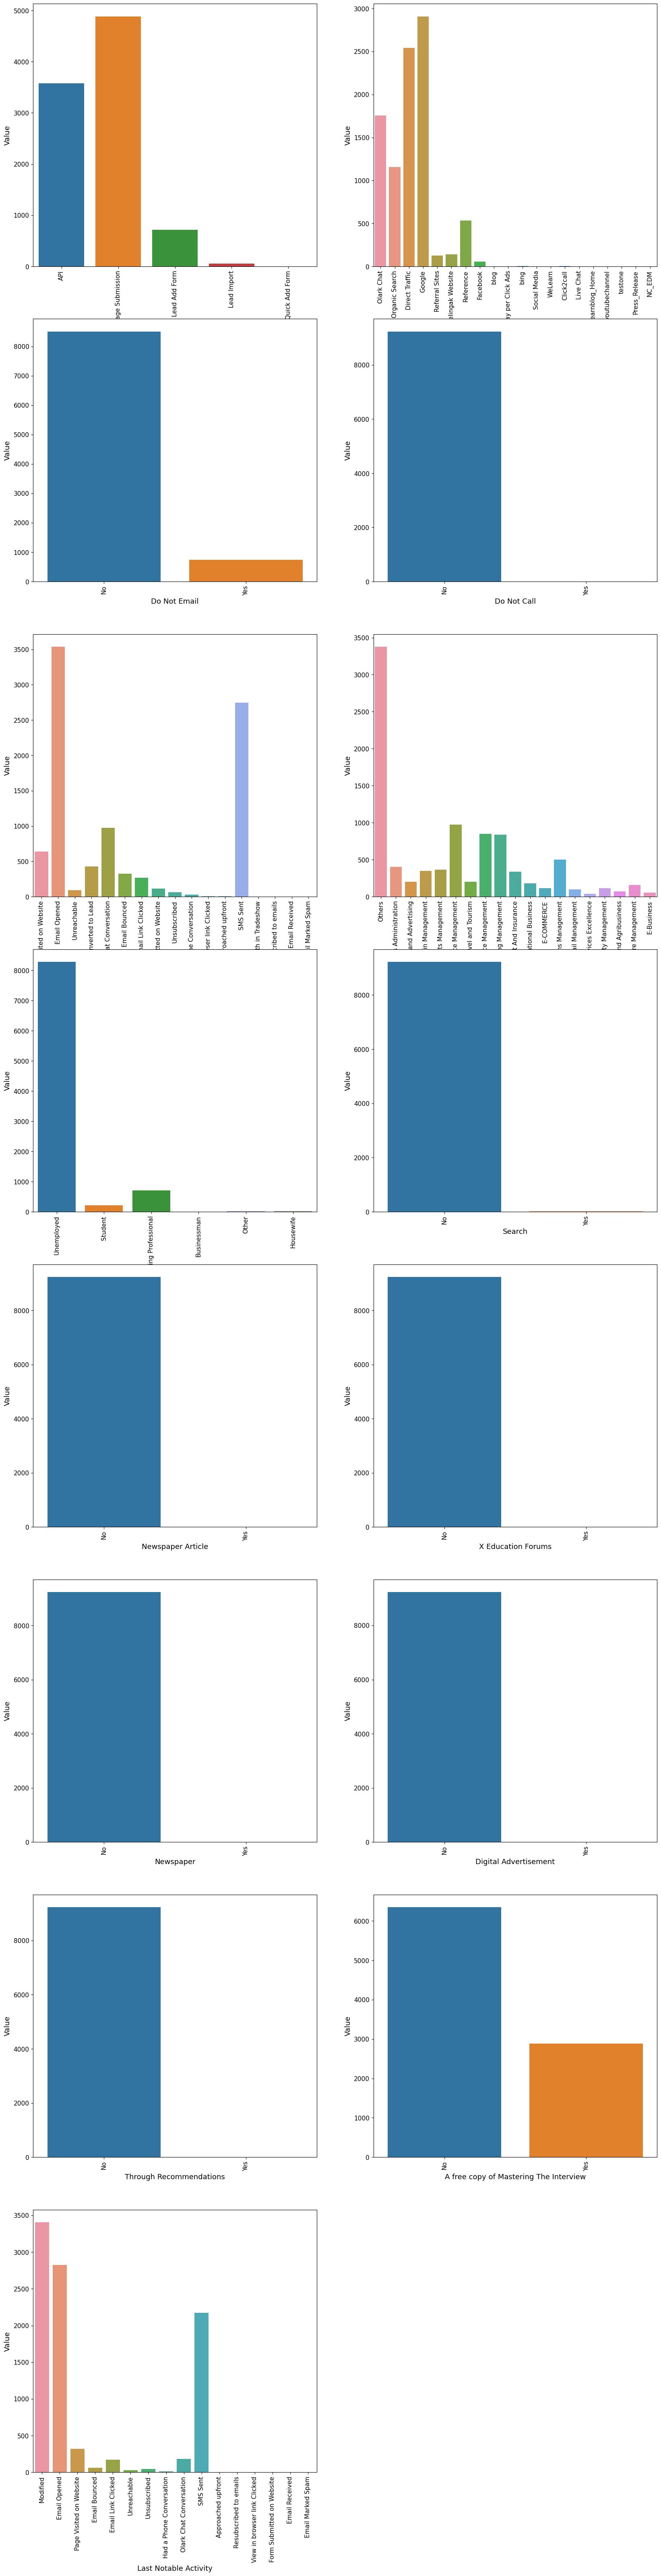

In [402]:
categorical_columns = Lead_df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(20, 100))

for i, col in enumerate(categorical_columns):
    plt.subplot(10, 2, i+1)
    ax = sns.countplot(x=col, data=Lead_df, orient='v')
    plt.xticks(rotation=90, fontsize=11)
    plt.yticks(fontsize=11)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('Value', fontsize=13)
    
    
plt.show()

                       From our above analysis we can see that :
                               1. 'Do Not Call',
                               2. 'Search',
                               3. 'Newspaper Article',
                               4. 'X Education Forums',
                               5. 'Newspaper',
                               6. 'Digital Advertisement',
                               7. 'Through Recommendations'

are the columns which are highly skewed and if we do not remove such columns it can lead to biased analyis or inaccurate params of our model


In [403]:
Lead_df.drop(columns=['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)

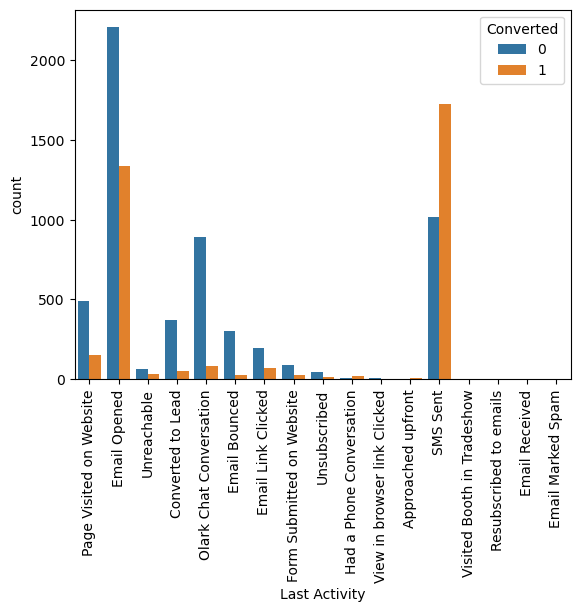

In [404]:
#looking at last activity
sns.countplot(x=Lead_df['Last Activity'],hue=Lead_df['Converted'])
plt.xticks(rotation=90)
plt.show()

Other than Email opened and SMS sent there are no major contributing factors to our analyis hence we will group low frequency values

In [405]:
##Grouping low frequency value levels to Others 

Lead_df['Last Activity'] = Lead_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [406]:
#re-checking the shape of our dataset
Lead_df.shape

(9240, 12)

In [407]:
#re-checkign the head of our data set
Lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,Modified


                                  CHECKING FOR OUTLIERS IN NUMERICAL COLUMNS

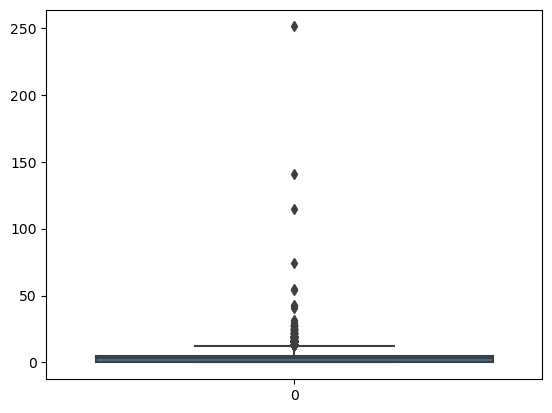

In [408]:
sns.boxplot(Lead_df['TotalVisits'])
plt.show()

As we can see there are quite a few outliers in this column,hence they need to be treated effectively

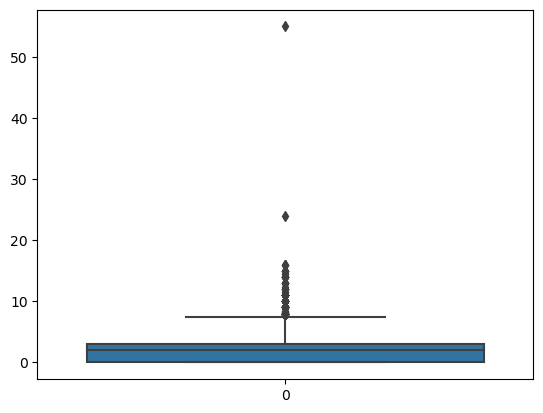

In [409]:
sns.boxplot(Lead_df['Page Views Per Visit'])
plt.show()

As we can see there are quite a few outliers in this column,hence they need to be treated effectively

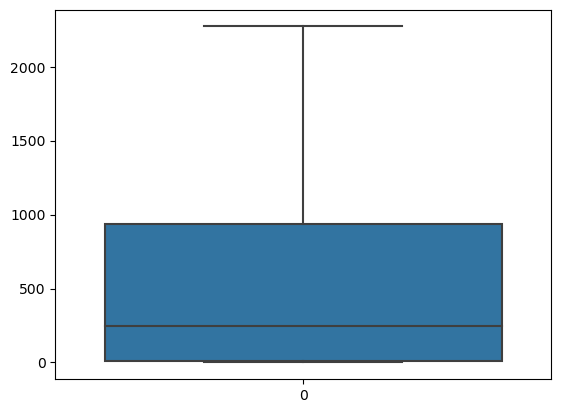

In [410]:
sns.boxplot(Lead_df['Total Time Spent on Website'])
plt.show()

There are no outliers for the above column

In [411]:
#Outlier Treatment

for i in Lead_df['TotalVisits']:
    Q1=np.quantile(Lead_df['TotalVisits'],.25)        

    Q3=np.quantile(Lead_df['TotalVisits'],.75)


    IQR=Q3-Q1


    LowerBound=Q1-1.5*IQR
 

    UpperBound=Q3+1.5*IQR


Lead_df['TotalVisits']=np.where(Lead_df['TotalVisits']<LowerBound,LowerBound,Lead_df['TotalVisits'])
Lead_df['TotalVisits']=np.where(Lead_df['TotalVisits']>UpperBound,UpperBound,Lead_df['TotalVisits'])

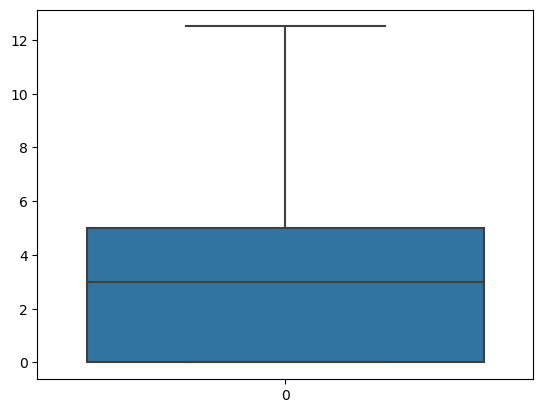

In [412]:
#After outlier treatment
sns.boxplot(Lead_df['TotalVisits'])
plt.show()

In [413]:
for i in Lead_df['Page Views Per Visit']:
    Q1=np.quantile(Lead_df['Page Views Per Visit'],.25)        

    Q3=np.quantile(Lead_df['Page Views Per Visit'],.75)


    IQR=Q3-Q1


    LowerBound=Q1-1.5*IQR
 

    UpperBound=Q3+1.5*IQR


Lead_df['Page Views Per Visit']=np.where(Lead_df['Page Views Per Visit']<LowerBound,LowerBound,Lead_df['Page Views Per Visit'])
Lead_df['Page Views Per Visit']=np.where(Lead_df['Page Views Per Visit']>UpperBound,UpperBound,Lead_df['Page Views Per Visit'])

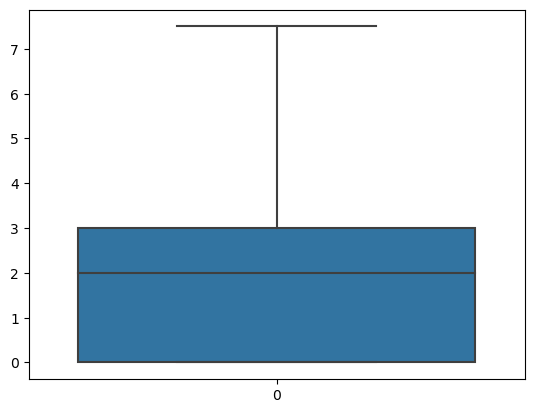

In [414]:
sns.boxplot(Lead_df['Page Views Per Visit'])
plt.show()

As we can see, we have treated the outliers effectivelty

In [415]:
#re-checking the head of our data set

Lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,Modified


In [416]:
#Now checking the value counts of categorical variables


columnsList1 = ["Lead Origin","Lead Source","Do Not Email","Specialization",'Last Activity',
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList1:
        percentage=100*Lead_df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(percentage,"\n")
        print("__"*33,"\n")

value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

__________________________________________________________________ 

value_counts % for : Lead Source 

Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
Pay per Click Ads     0.010823
blog                  0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
youtubechannel        0.010823
testone               0.010823
NC_EDM                0.010823
Name: Lead Source, d

As we can see that some some values in the "Lead Score" and have very few records. To prevent creation of a lot of dummy variables, we will group these categories together under "Others". 

                                  GROUPING LOW FREQUENCY VALUES

In [417]:
Lead_df['Lead Source'] = Lead_df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

In [418]:
#looking at the value counts now 
Lead_df['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

In [419]:
#re-checking the head of our data set
Lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,Modified


In [420]:
#dropping Last Notable Activity as it is of our no use

Lead_df.drop(columns='Last Notable Activity',axis=1,inplace=True)

In [421]:
#re-checking the head
Lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [422]:
#changing some column names for better readability

Lead_df.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)
Lead_df.rename(columns={'What is your current occupation': 'Current_Occupation'}, inplace=True)
Lead_df.rename(columns={'Do Not Email': 'Email'}, inplace=True)

In [423]:
#re-checking the head of our dataset
Lead_df.head()


,Lead Origin,Lead Source,Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_Occupation,Free_copy
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [424]:
#checking the data types 
Lead_df.dtypes

Lead Origin                     object
Lead Source                     object
Email                           object
Converted                        int64
TotalVisits                    float64
Total Time Spent on Website      int64
Page Views Per Visit           float64
Last Activity                   object
Specialization                  object
Current_Occupation              object
Free_copy                       object
dtype: object

All the data types are also alright and we do not need to change any data type

In [425]:
Lead_df.shape

(9240, 11)

In [426]:
print(f'As we can see our final data set, after cleaning has {Lead_df.shape[0]} rows and {Lead_df.shape[1]} columns')

As we can see our final data set, after cleaning has 9240 rows and 11 columns


### STEP 2- EXPLORATORY DATA ANALYSIS

Before proceeding further to exploratory data analysis ,we need to check whether our data is imbalanced or not . The imbalancement of data is only checked in the context of Target Variable 
In this case, our target variable is 'Converted'

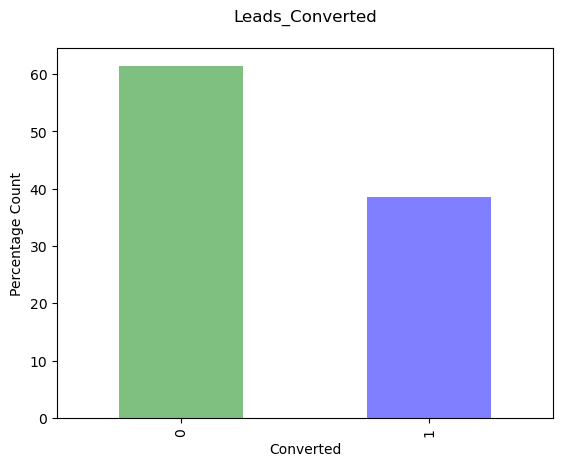

In [427]:
#for this we will plot a bar chart 

x=(100*Lead_df["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Blue"],alpha=0.5)


plt.title("Leads_Converted\n")


# Labeling Axes
plt.xlabel('Converted')
plt.ylabel("Percentage Count")

plt.show()

As we can see around 38.5%(Minority) of the leads have been coverted 

In [428]:
# Ratio of Data Imbalance

ratio = (Lead_df['Converted'].value_counts(normalize = True).loc[0])/(Lead_df['Converted'].value_counts(normalize = True).loc[1])

print("Data Imbalance Ratio: {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio: 1.59 : 1


### UNIVARIATE ANALYSIS- SIMPLE UNIVARIATE ANALYSIS

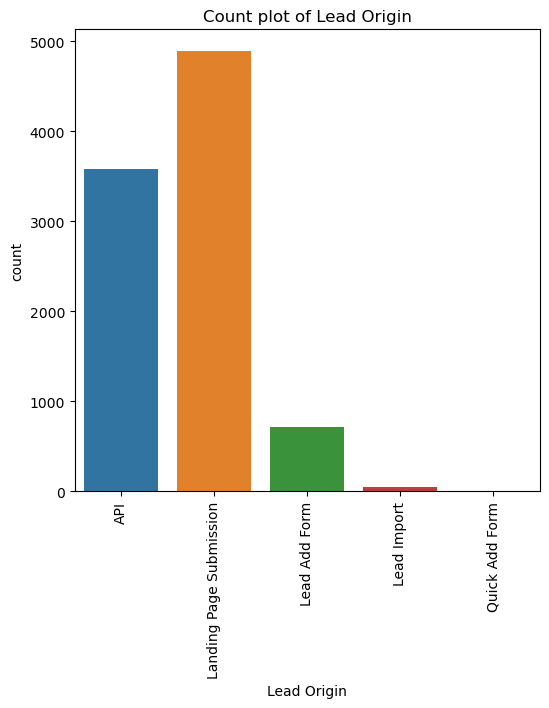

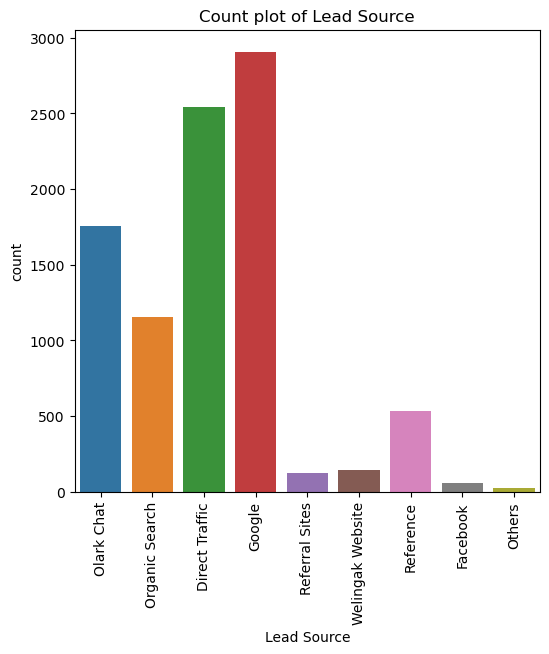

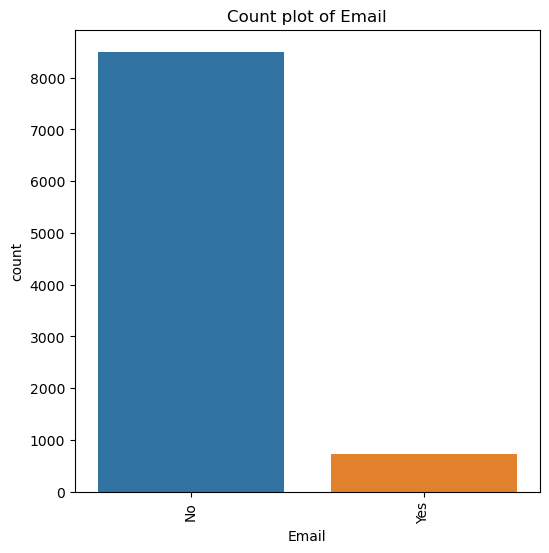

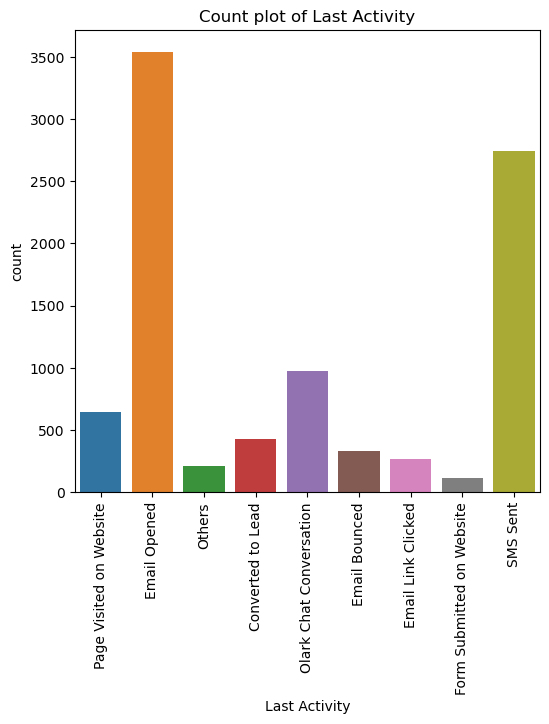

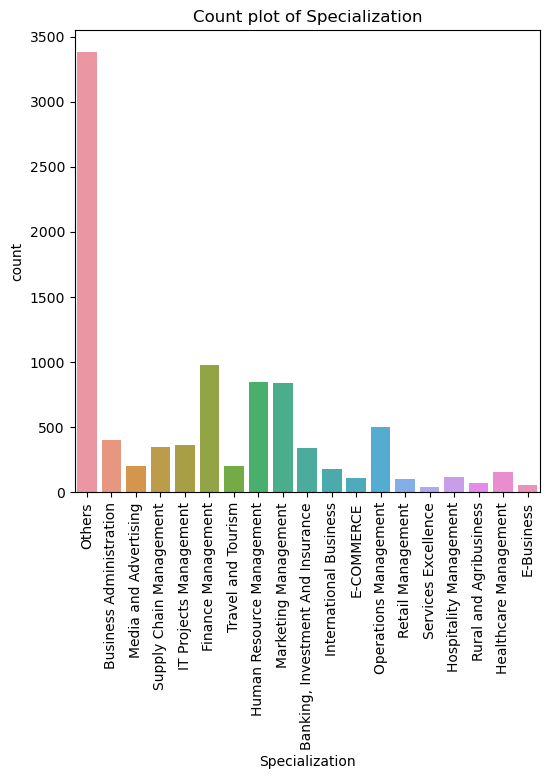

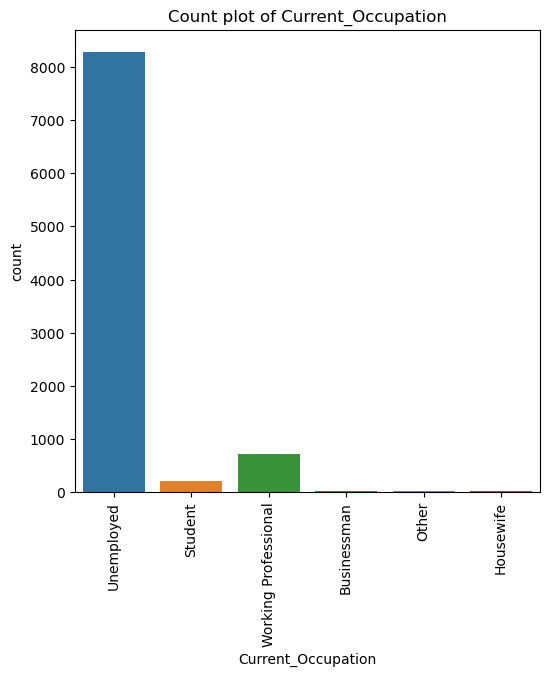

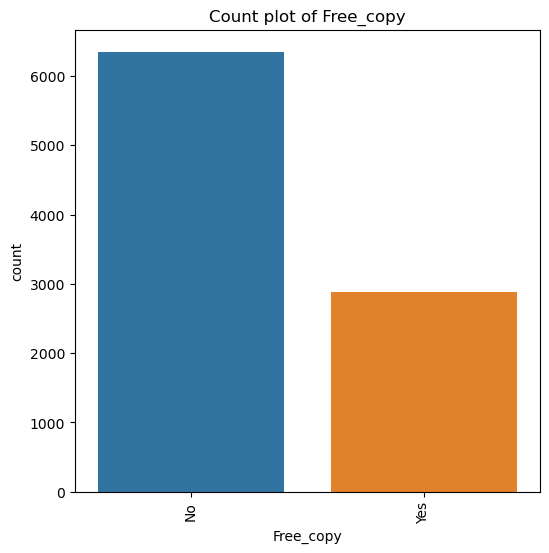

In [429]:
#making a list of all the categorical columns

category=['Lead Origin','Lead Source','Email','Last Activity','Specialization','Current_Occupation','Free_copy']

for i in category:
    plt.figure(figsize=[6,6])
    plt.title(f'Count plot of {i}')
    x=sns.countplot(x=i,data=Lead_df)
    total=len(Lead_df[i])
    plt.xticks(rotation=90)
    
    for p in x.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        y=p.get_y() + p.get_width() / 2.
        z=p.get_height()
        
    

### SOME INSIGHTS BASED ON SIMPLE UNIVARIATE ANALYSIS

1. Landing Page Submission is the most popular lead origin amongst all followed by API.
2. The most commonly used lead source used is Google followed by Direct Traffic
3. Most people have opted 'NO' for Email as well as Free Copy
4. Most users are 'Unemployed'


### BI-VARIATE ANALYSIS

In [430]:
def Bivariate_Analysis(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    ax=sns.countplot(x=variable_name,hue=Target,data=Lead_df,palette="prism_r",alpha=0.46)
    
    
    total=len(Lead_df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")

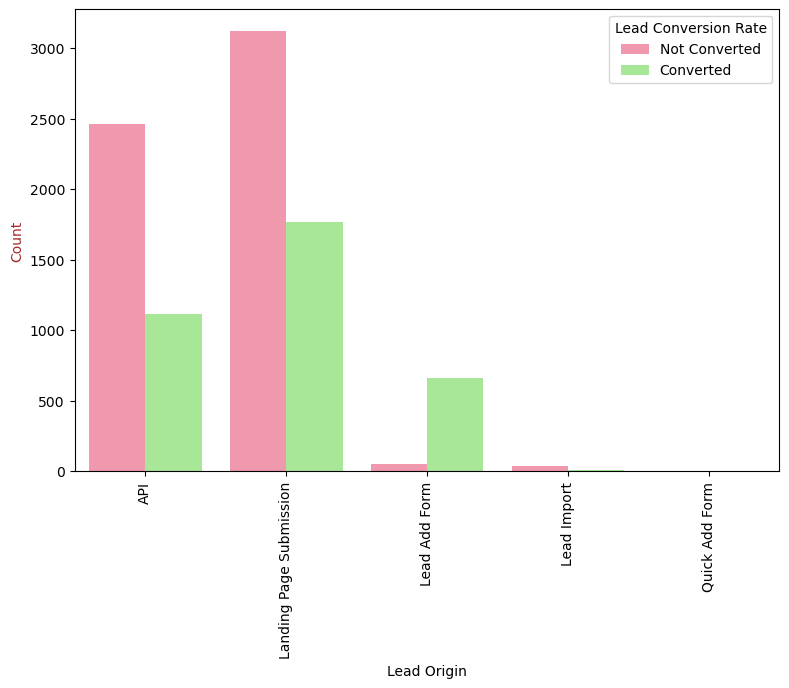

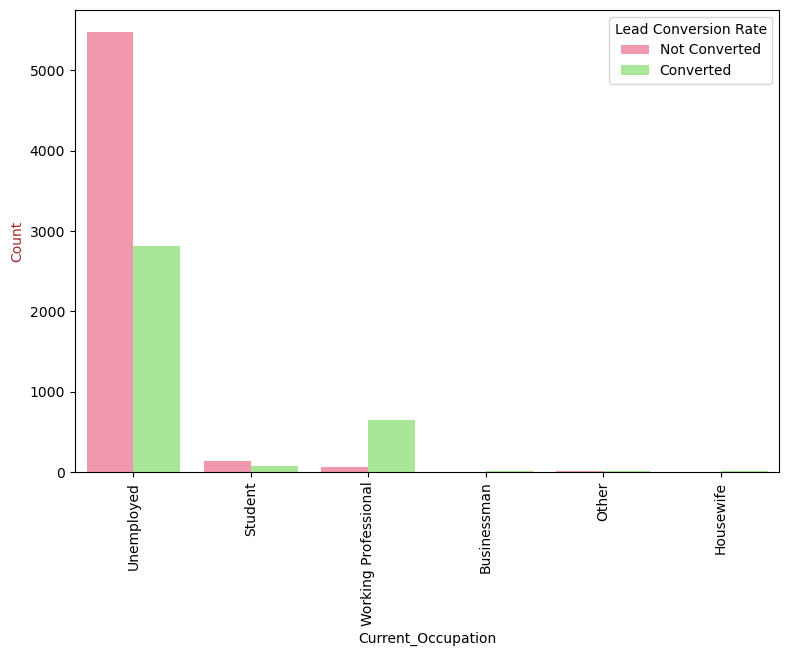

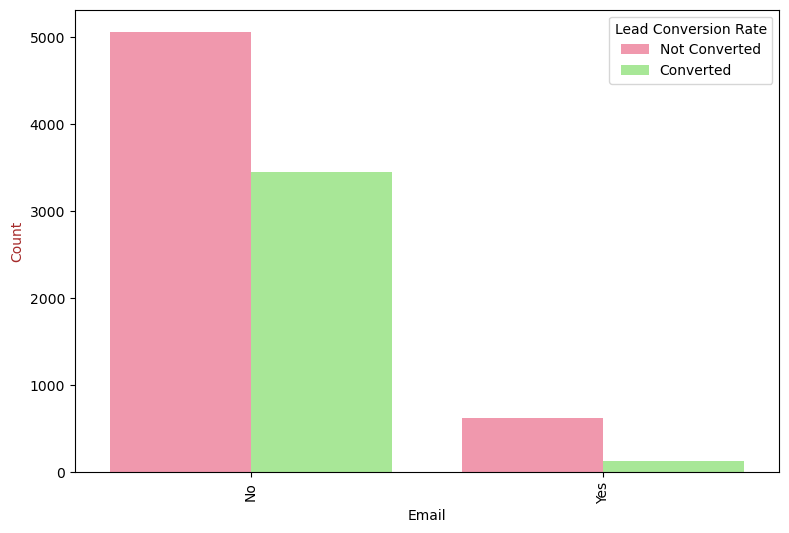

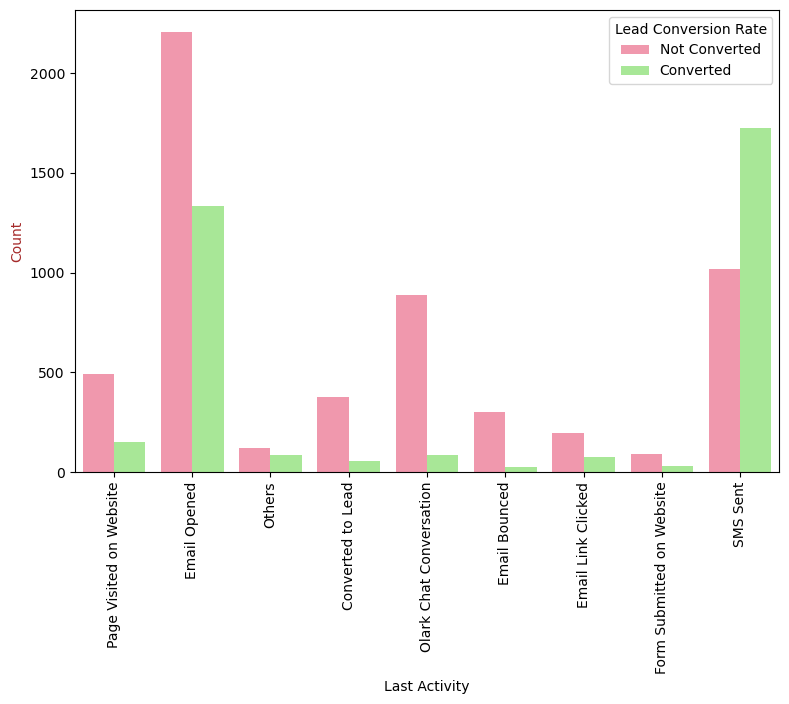

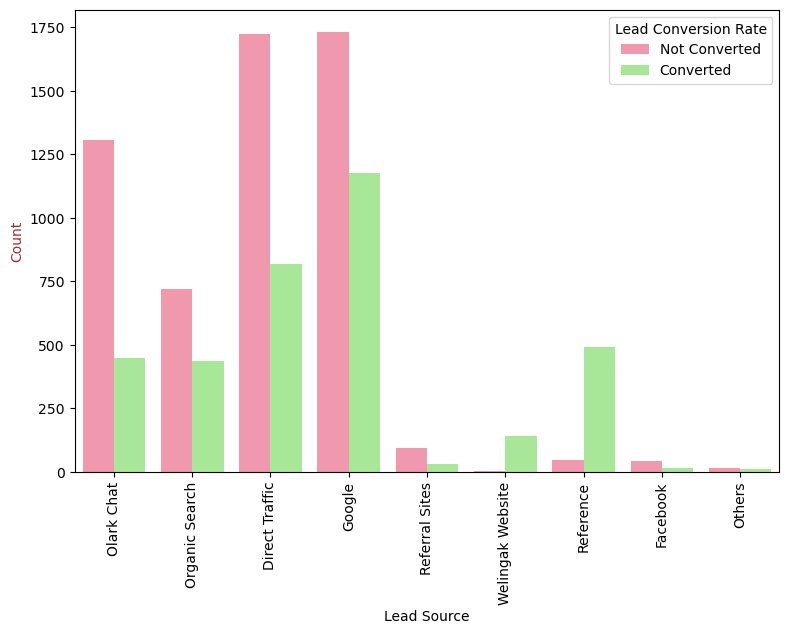

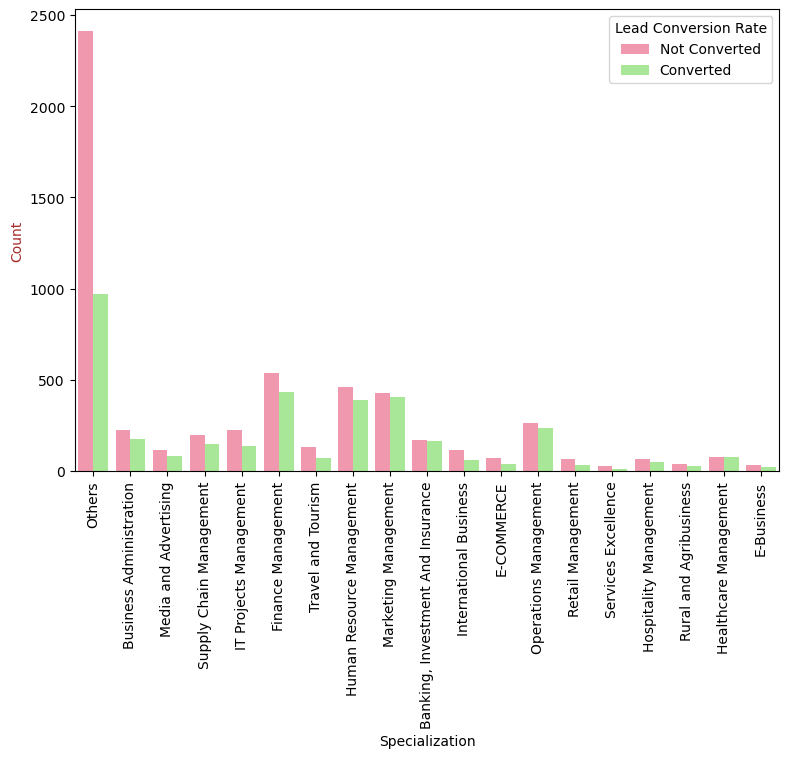

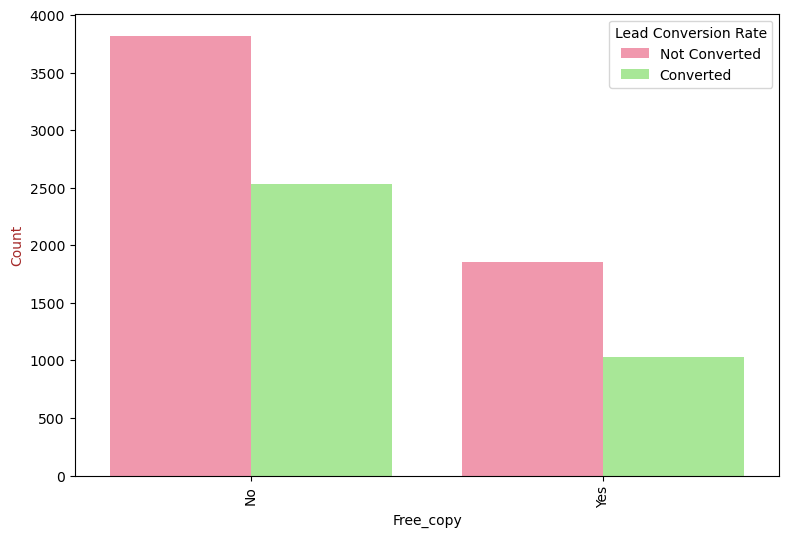

In [431]:

cat_cols = ["Lead Origin","Current_Occupation","Email",'Last Activity',"Lead Source","Specialization","Free_copy"]

for i in cat_cols:
    Bivariate_Analysis(Lead_df,variable_name=i)

Lead Origin:Lead Conversion Rate is high in Landing Page Submission ,followed by API.Lead Import and Quick Add form do not add any value to our conversion

Current_occupation: Most lead conversions are from users who are unemployed followed by working professionals .The rationale behind this is those who are 'unemployed' are looking to be employable and those who are 'working professionals' are looking for a chance to upskill themselves

Do Not Email: Most of the people have opted 'NO' ie that they dont want to be emailed about the course.


Lead Source: Most lead conversions are from sources namely:
1.Google 
2.Direct Traffic
3.Olark Chat


Specialization: Marketing Managemt,HR Management,Finance Management show good contribution.

In [432]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

<Figure size 1600x400 with 0 Axes>

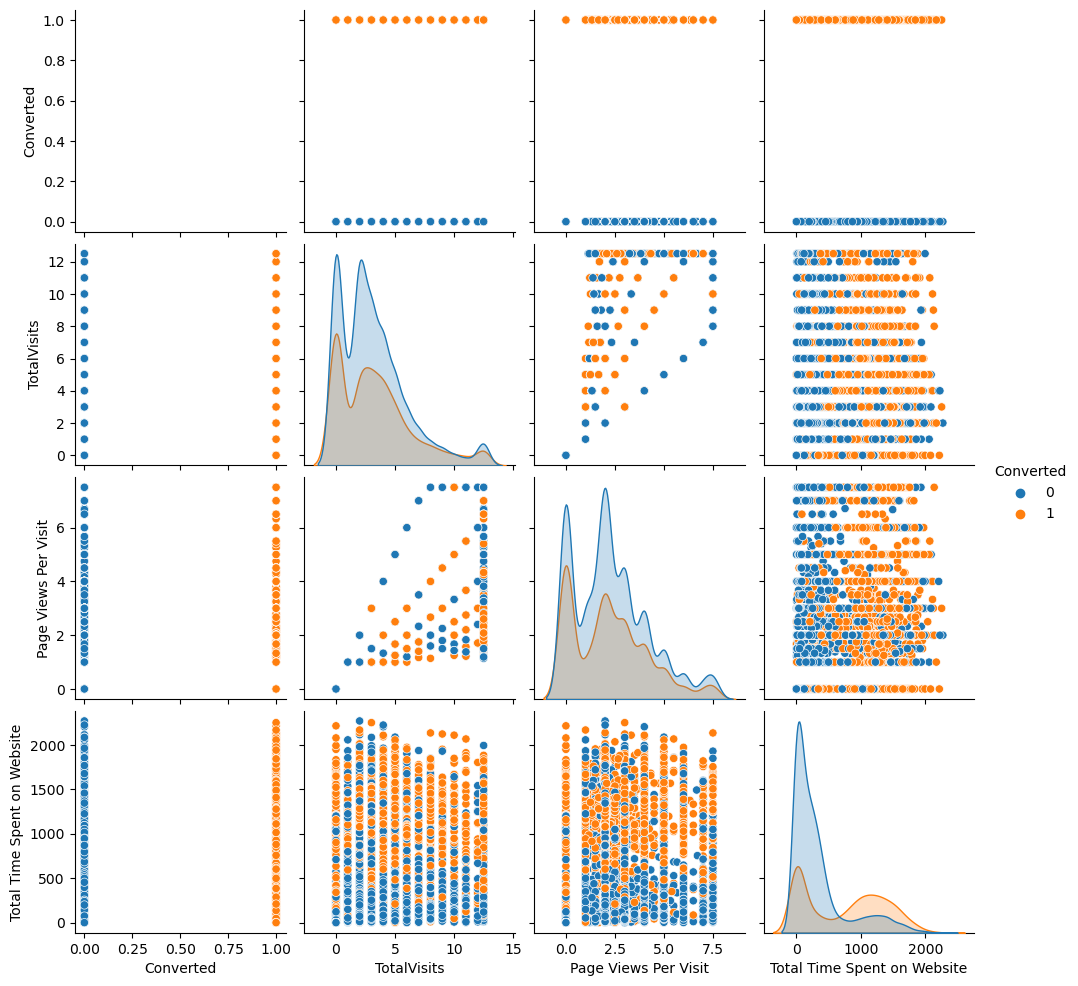

In [433]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=Lead_df,vars=num_cols,hue="Converted")                                  
plt.show()

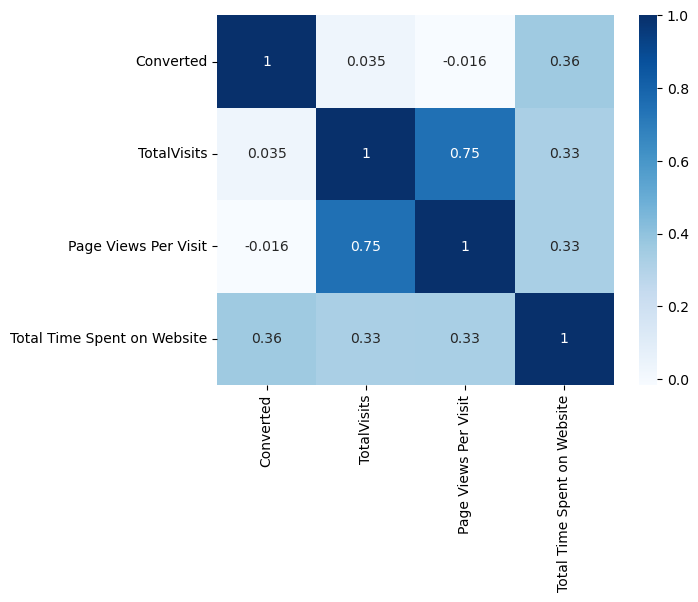

In [434]:
sns.heatmap(data=Lead_df[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

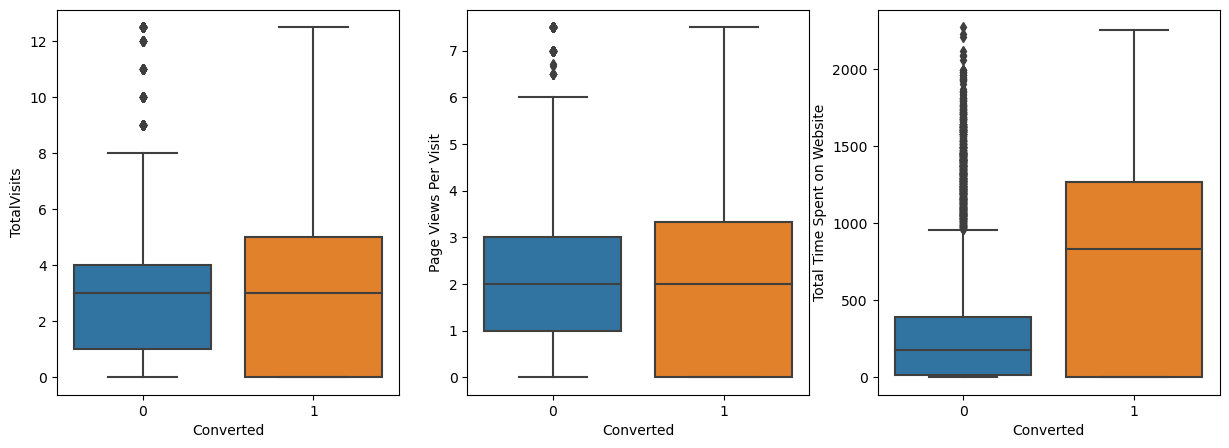

In [435]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Lead_df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = Lead_df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Lead_df)
plt.show()

Inference- Those who spend more time on website are likely to get converted as a lead

### STEP 3- MODEL BUILDING 

In [436]:
Lead_df.head()

,Lead Origin,Lead Source,Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_Occupation,Free_copy
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [437]:
#creating dummy variables for categorical columns
Lead_df.head()

,Lead Origin,Lead Source,Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_Occupation,Free_copy
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [438]:
dummy_var = pd.get_dummies(Lead_df[["Lead Origin","Lead Source",'Specialization','Last Activity',"Current_Occupation",'Email','Free_copy']], drop_first=True)

In [439]:
Lead_df = pd.concat([Lead_df, dummy_var], axis=1)

In [440]:
#Re-checking the head again
Lead_df.head()

,Lead Origin,Lead Source,Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_Occupation,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Email_Yes,Free_copy_Yes
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [441]:
#checking the head of our dataset
Lead_df.shape

(9240, 56)

In [442]:
#dropping original categorical columns after dummy creation 
Lead_df = Lead_df.drop(["Lead Origin","Lead Source","Specialization","Current_Occupation",'Email','Free_copy','Last Activity'],axis=1)


In [443]:
#Re-checking the shape of our dataset
Lead_df.shape

(9240, 49)

In [444]:
#checking the data types of our column
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Converted                                 9240 non-null   int64  
 1   TotalVisits                               9240 non-null   float64
 2   Total Time Spent on Website               9240 non-null   int64  
 3   Page Views Per Visit                      9240 non-null   float64
 4   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 5   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 6   Lead Origin_Lead Import                   9240 non-null   uint8  
 7   Lead Origin_Quick Add Form                9240 non-null   uint8  
 8   Lead Source_Facebook                      9240 non-null   uint8  
 9   Lead Source_Google                        9240 non-null   uint8  
 10  Lead Source_Olark Chat              

### TRAIN-TEST SPLIT 

In [445]:
#Putting all the independent variables to X
X = Lead_df.drop('Converted', axis=1)

#Creating target variable
y = Lead_df["Converted"]

In [446]:
#importing all the required libraries 
#sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [447]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [448]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [449]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


### FEATURE SCALING

In [450]:
#using scaler for scaling the features
scaler = StandardScaler()


In [451]:
numerical_columns=X_train.select_dtypes(include=['int64','float64']).columns

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

In [452]:
#looking at the head once again
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Email_Yes,Free_copy_Yes
1871,-1.064974,-0.885371,-1.184892,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
6795,0.262370,0.005716,-0.488713,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3516,0.594206,-0.691418,0.123715,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
8105,0.594206,1.365219,1.432322,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3934,-1.064974,-0.885371,-1.184892,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


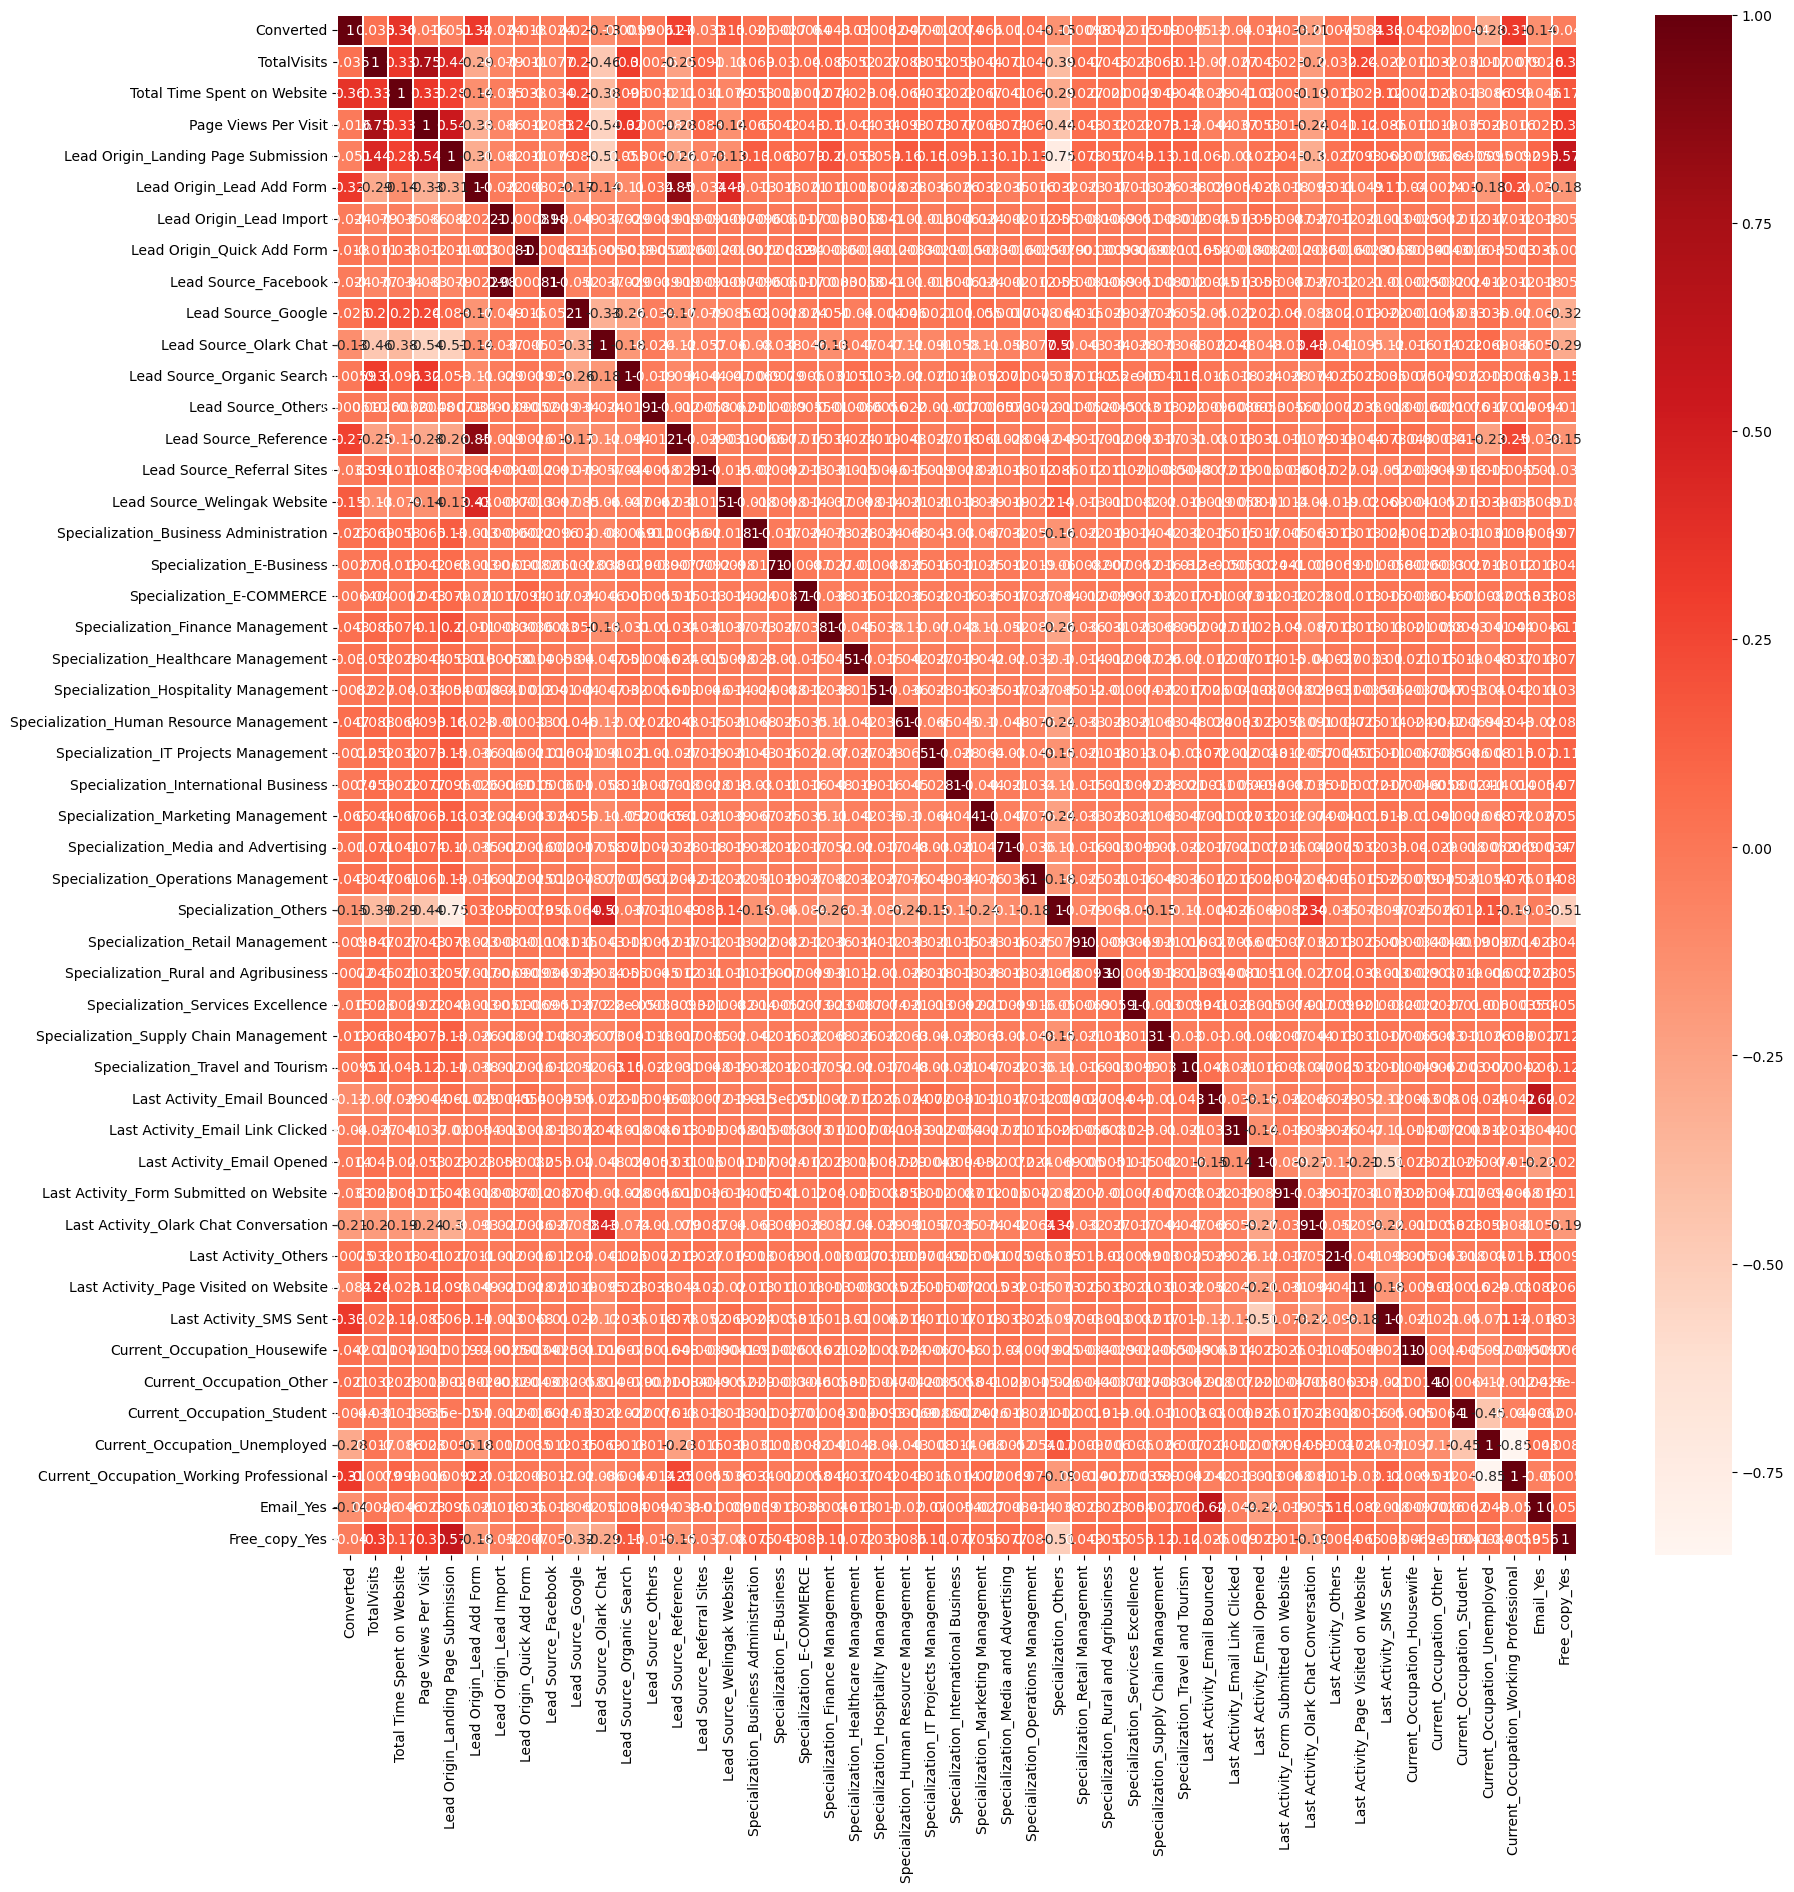

In [453]:
#Checking for correlation

plt.figure(figsize = (20,20))        
sns.heatmap(Lead_df.corr(),linewidths=0.01,cmap="Reds",annot=True)
plt.show()


In [454]:
#Now using RFE as well as Manual Tuning we will start building our model
Lead_df.shape

(9240, 49)

In [455]:
#Using RFE we will select the top 23 columns and build our model using manual tuning thereafter

In [456]:
LR= LogisticRegression()
rfe = RFE(LR, n_features_to_select=23)            
rfe = rfe.fit(X_train, y_train)

In [457]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Origin_Quick Add Form', False, 6),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Others', False, 5),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 9),
 ('Specialization_E-Business', False, 23),
 ('Specialization_E-COMMERCE', False, 14),
 ('Specialization_Finance Management', False, 20),
 ('Specialization_Healthcare Management', False, 19),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 11),
 ('Specialization_IT Projects Management', Fa

In [458]:
#Columns which are selected by RFE
selected_columns = X_train.columns[rfe.support_]
print(selected_columns)

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Specialization_Hospitality Management', 'Specialization_International Business', 'Specialization_Others', 'Specialization_Retail Management', 'Specialization_Rural and Agribusiness', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 'Last Activity_Others', 'Last Activity_SMS Sent', 'Current_Occupation_Housewife', 'Current_Occupation_Other', 'Current_Occupation_Student', 'Current_Occupation_Unemployed', 'Current_Occupation_Working Professional', 'Email_Yes', 'Free_copy_Yes'], dtype='object')


In [459]:
#Columns which are not selected by RFE

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Services Excellence', 'Specialization_Supply Chain Management', 'Specialization_Travel and Tourism', 'Last Activity_Email Bounced', 'Last Activity_Form Submitted on Website', 'Last Activity_Page Visited on Website'], dtype='object')

In [460]:
#Computing all the selected columns in a variable known as X_train_selected
X_train_selected = X_train[selected_columns]
X_train_selected.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_International Business,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Email_Yes,Free_copy_Yes
1871,-0.885371,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
6795,0.005716,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3516,-0.691418,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8105,1.365219,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3934,-0.885371,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [461]:
#Adding a constant as it does not have a built in constant
X_train_selected= sm.add_constant(X_train_selected)

In [462]:
#Building our first logistic  model

lr1=sm.OLS(y_train,X_train_selected)
lr1=lr1.fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     199.9
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:23:54   Log-Likelihood:                -2764.9
No. Observations:                6468   AIC:                             5578.
Df Residuals:                    6444   BIC:                             5740.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.3758      0.152      2.464      0.014       0.077       0.675
Total Time Spent on Website                 0.1833      0.005     35.248      0.000       0.173       0.194
Lead Origin_Landing Page Submission        -0.1452      0.018     -8.134      0.000      -0.180      -0.110
Lead Origin_Lead Add Form                   0.4260      0.023     18.484      0.000       0.381       0.471
Lead Source_Facebook                       -0.0845      0.066     -1.285      0.199      -0.213       0.044
Lead Source_Olark Chat                      0.1452      0.016      8.883      0.000       0.113       0.177
Lead Source_Welingak Website                0.2929      0.044      6.618      0.000       0.206       0.380
Specialization_Hospitality Management      -0.1215      0.040     -3.010      0.003      -0.201      -0.042
Specialization_International Business      -0.0698      0.034     -2.030      0.042      -0.137      -0.002
Specialization_Others                      -0.1770      0.017    -10.508      0.000      -0.210      -0.144
Specialization_Retail Management           -0.0522      0.045     -1.163      0.245      -0.140       0.036
Specialization_Rural and Agribusiness       0.0921      0.055      1.685      0.092      -0.015       0.199
Last Activity_Email Link Clicked            0.0210      0.030      0.690      0.490      -0.039       0.081
Last Activity_Email Opened                  0.0962      0.015      6.555      0.000       0.067       0.125
Last Activity_Olark Chat Conversation      -0.0765      0.021     -3.666      0.000      -0.117      -0.036
Last Activity_Others                        0.1720      0.034      5.033      0.000       0.105       0.239
Last Activity_SMS Sent                      0.2987      0.015     20.012      0.000       0.269       0.328
Current_Occupation_Housewife                0.4475      0.196      2.280      0.023       0.063       0.832
Current_Occupation_Other                   -0.0686      0.201     -0.341      0.733      -0.463       0.325
Current_Occupation_Student                  0.0330      0.155      0.213      0.832      -0.272       0.338
Current_Occupation_Unemployed              -0.0409      0.152     -0.269      0.788      -0.339       0.257
Current_Occupation_Working Professional     0.2773      0.153      1.814      0.070      -0.022       0.577
Email_Yes                                  -0.1226      0.019     -6.549      0.000      -0.159      -0.086
Free_copy_Yes                              -0.0459      0.012     -3.732      0.000      -0.070      -0.022
==============================================================================
Omnibus:                      155.843   Durbin-Watson:                   2.001
Prob(Omni

Now we will drop variables based on:
1. Significance - p values 
2. VIF values - How are the independent variables correlated 
3. We are using a hybrid approach of building the model

In [463]:
#CHecking for vif values
vif = pd.DataFrame()
vif['Features'] = X_train_selected.columns
vif['VIF'] = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1088.45
20,Current_Occupation_Unemployed,99.41
21,Current_Occupation_Working Professional,78.34
19,Current_Occupation_Student,23.27
2,Lead Origin_Landing Page Submission,3.72
9,Specialization_Others,3.09
17,Current_Occupation_Housewife,2.51
13,Last Activity_Email Opened,2.38
18,Current_Occupation_Other,2.33
16,Last Activity_SMS Sent,2.19


In [464]:
### Removing Current Occupation Other as it has high P value and high VIF value as well

In [465]:
X= X_train_selected.drop('Current_Occupation_Student',axis=1)
X.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_International Business,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Email_Yes,Free_copy_Yes
1871,1.0,-0.885371,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
6795,1.0,0.005716,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
3516,1.0,-0.691418,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
8105,1.0,1.365219,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3934,1.0,-0.885371,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [466]:
#BUILDING OUR 2ND MODEL
X_train_sm= sm.add_constant(X)
lr2=sm.OLS(y_train,X_train_sm)
lr2=lr2.fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     209.1
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:23:54   Log-Likelihood:                -2764.9
No. Observations:                6468   AIC:                             5576.
Df Residuals:                    6445   BIC:                             5732.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.4072      0.037     10.892      0.000       0.334       0.481
Total Time Spent on Website                 0.1833      0.005     35.251      0.000       0.173       0.194
Lead Origin_Landing Page Submission        -0.1450      0.018     -8.133      0.000      -0.180      -0.110
Lead Origin_Lead Add Form                   0.4261      0.023     18.489      0.000       0.381       0.471
Lead Source_Facebook                       -0.0844      0.066     -1.284      0.199      -0.213       0.044
Lead Source_Olark Chat                      0.1452      0.016      8.887      0.000       0.113       0.177
Lead Source_Welingak Website                0.2928      0.044      6.618      0.000       0.206       0.380
Specialization_Hospitality Management      -0.1214      0.040     -3.009      0.003      -0.201      -0.042
Specialization_International Business      -0.0698      0.034     -2.029      0.042      -0.137      -0.002
Specialization_Others                      -0.1769      0.017    -10.508      0.000      -0.210      -0.144
Specialization_Retail Management           -0.0521      0.045     -1.162      0.245      -0.140       0.036
Specialization_Rural and Agribusiness       0.0922      0.055      1.688      0.092      -0.015       0.199
Last Activity_Email Link Clicked            0.0210      0.030      0.692      0.489      -0.039       0.081
Last Activity_Email Opened                  0.0963      0.015      6.562      0.000       0.068       0.125
Last Activity_Olark Chat Conversation      -0.0765      0.021     -3.664      0.000      -0.117      -0.036
Last Activity_Others                        0.1718      0.034      5.029      0.000       0.105       0.239
Last Activity_SMS Sent                      0.2988      0.015     20.022      0.000       0.270       0.328
Current_Occupation_Housewife                0.4159      0.128      3.247      0.001       0.165       0.667
Current_Occupation_Other                   -0.1002      0.135     -0.741      0.459      -0.365       0.165
Current_Occupation_Unemployed              -0.0725      0.032     -2.289      0.022      -0.135      -0.010
Current_Occupation_Working Professional     0.2457      0.036      6.817      0.000       0.175       0.316
Email_Yes                                  -0.1226      0.019     -6.547      0.000      -0.159      -0.086
Free_copy_Yes                              -0.0459      0.012     -3.729      0.000      -0.070      -0.022
==============================================================================
Omnibus:                      155.954   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.566
Skew:                           0.385 

In [467]:
#Checking for the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,65.44
20,Current_Occupation_Working Professional,4.36
19,Current_Occupation_Unemployed,4.31
2,Lead Origin_Landing Page Submission,3.71
9,Specialization_Others,3.08
13,Last Activity_Email Opened,2.38
16,Last Activity_SMS Sent,2.19
5,Lead Source_Olark Chat,1.92
14,Last Activity_Olark Chat Conversation,1.87
3,Lead Origin_Lead Add Form,1.82


In [468]:
#Removing Current Occupation_Other as it has high P value

In [469]:
X= X.drop('Current_Occupation_Other',axis=1)
X.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_International Business,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Current_Occupation_Housewife,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Email_Yes,Free_copy_Yes
1871,1.0,-0.885371,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6795,1.0,0.005716,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
3516,1.0,-0.691418,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
8105,1.0,1.365219,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3934,1.0,-0.885371,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0


In [470]:
#BUILDING OUR 3RD MODEL
X_train_sm= sm.add_constant(X)
lr3=sm.OLS(y_train,X_train_sm)
lr3=lr3.fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     219.0
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:23:54   Log-Likelihood:                -2765.2
No. Observations:                6468   AIC:                             5574.
Df Residuals:                    6446   BIC:                             5723.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.4014      0.037     10.983      0.000       0.330       0.473
Total Time Spent on Website                 0.1832      0.005     35.245      0.000       0.173       0.193
Lead Origin_Landing Page Submission        -0.1447      0.018     -8.117      0.000      -0.180      -0.110
Lead Origin_Lead Add Form                   0.4264      0.023     18.508      0.000       0.381       0.472
Lead Source_Facebook                       -0.0843      0.066     -1.282      0.200      -0.213       0.045
Lead Source_Olark Chat                      0.1454      0.016      8.899      0.000       0.113       0.177
Lead Source_Welingak Website                0.2925      0.044      6.610      0.000       0.206       0.379
Specialization_Hospitality Management      -0.1211      0.040     -3.002      0.003      -0.200      -0.042
Specialization_International Business      -0.0696      0.034     -2.023      0.043      -0.137      -0.002
Specialization_Others                      -0.1765      0.017    -10.492      0.000      -0.210      -0.144
Specialization_Retail Management           -0.0519      0.045     -1.157      0.247      -0.140       0.036
Specialization_Rural and Agribusiness       0.0928      0.055      1.698      0.090      -0.014       0.200
Last Activity_Email Link Clicked            0.0212      0.030      0.697      0.486      -0.038       0.081
Last Activity_Email Opened                  0.0964      0.015      6.571      0.000       0.068       0.125
Last Activity_Olark Chat Conversation      -0.0765      0.021     -3.664      0.000      -0.117      -0.036
Last Activity_Others                        0.1720      0.034      5.035      0.000       0.105       0.239
Last Activity_SMS Sent                      0.2990      0.015     20.039      0.000       0.270       0.328
Current_Occupation_Housewife                0.4213      0.128      3.294      0.001       0.171       0.672
Current_Occupation_Unemployed              -0.0672      0.031     -2.177      0.029      -0.128      -0.007
Current_Occupation_Working Professional     0.2512      0.035      7.116      0.000       0.182       0.320
Email_Yes                                  -0.1226      0.019     -6.548      0.000      -0.159      -0.086
Free_copy_Yes                              -0.0459      0.012     -3.729      0.000      -0.070      -0.022
==============================================================================
Omnibus:                      155.801   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.366
Skew:                           0.385   Prob(JB):                     1.23e-36
Kurtosis:                       2.857   Cond. No.                  

In [471]:
#Checking for the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,62.53
19,Current_Occupation_Working Professional,4.18
18,Current_Occupation_Unemployed,4.09
2,Lead Origin_Landing Page Submission,3.71
9,Specialization_Others,3.08
13,Last Activity_Email Opened,2.38
16,Last Activity_SMS Sent,2.19
5,Lead Source_Olark Chat,1.92
14,Last Activity_Olark Chat Conversation,1.87
3,Lead Origin_Lead Add Form,1.82


In [472]:
#Email link clicked has high VIf value
X= X.drop('Last Activity_Email Link Clicked',axis=1)
X.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_International Business,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Current_Occupation_Housewife,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Email_Yes,Free_copy_Yes
1871,1.0,-0.885371,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6795,1.0,0.005716,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
3516,1.0,-0.691418,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
8105,1.0,1.365219,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3934,1.0,-0.885371,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [473]:
#Building our 4th model
X_train_sm= sm.add_constant(X)
lr4=sm.OLS(y_train,X_train_sm)
lr4=lr4.fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     229.9
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:23:55   Log-Likelihood:                -2765.4
No. Observations:                6468   AIC:                             5573.
Df Residuals:                    6447   BIC:                             5715.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.4045      0.036     11.157      0.000       0.333       0.476
Total Time Spent on Website                 0.1831      0.005     35.239      0.000       0.173       0.193
Lead Origin_Landing Page Submission        -0.1447      0.018     -8.119      0.000      -0.180      -0.110
Lead Origin_Lead Add Form                   0.4269      0.023     18.537      0.000       0.382       0.472
Lead Source_Facebook                       -0.0842      0.066     -1.280      0.200      -0.213       0.045
Lead Source_Olark Chat                      0.1463      0.016      8.990      0.000       0.114       0.178
Lead Source_Welingak Website                0.2926      0.044      6.613      0.000       0.206       0.379
Specialization_Hospitality Management      -0.1213      0.040     -3.005      0.003      -0.200      -0.042
Specialization_International Business      -0.0696      0.034     -2.026      0.043      -0.137      -0.002
Specialization_Others                      -0.1764      0.017    -10.488      0.000      -0.209      -0.143
Specialization_Retail Management           -0.0525      0.045     -1.171      0.242      -0.140       0.035
Specialization_Rural and Agribusiness       0.0922      0.055      1.688      0.091      -0.015       0.199
Last Activity_Email Opened                  0.0927      0.014      6.773      0.000       0.066       0.120
Last Activity_Olark Chat Conversation      -0.0806      0.020     -4.030      0.000      -0.120      -0.041
Last Activity_Others                        0.1691      0.034      4.988      0.000       0.103       0.236
Last Activity_SMS Sent                      0.2955      0.014     21.034      0.000       0.268       0.323
Current_Occupation_Housewife                0.4232      0.128      3.309      0.001       0.173       0.674
Current_Occupation_Unemployed              -0.0669      0.031     -2.168      0.030      -0.127      -0.006
Current_Occupation_Working Professional     0.2515      0.035      7.128      0.000       0.182       0.321
Email_Yes                                  -0.1248      0.018     -6.757      0.000      -0.161      -0.089
Free_copy_Yes                              -0.0458      0.012     -3.724      0.000      -0.070      -0.022
==============================================================================
Omnibus:                      155.723   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.289
Skew:                           0.385   Prob(JB):                     1.28e-36
Kurtosis:                       2.858   Cond. No.                         45.6
==============================================================================

Notes:
[1] Stand

In [474]:
#Dropping column with high P value
X= X.drop('Specialization_Retail Management',axis=1)
X.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_International Business,Specialization_Others,Specialization_Rural and Agribusiness,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Current_Occupation_Housewife,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Email_Yes,Free_copy_Yes
1871,1.0,-0.885371,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6795,1.0,0.005716,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
3516,1.0,-0.691418,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0
8105,1.0,1.365219,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3934,1.0,-0.885371,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0


In [475]:
#Building our 5th model
X_train_sm= sm.add_constant(X)
lr5=sm.OLS(y_train,X_train_sm)
lr5=lr5.fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     242.0
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:23:55   Log-Likelihood:                -2766.1
No. Observations:                6468   AIC:                             5572.
Df Residuals:                    6448   BIC:                             5708.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.4037      0.036     11.136      0.000       0.333       0.475
Total Time Spent on Website                 0.1830      0.005     35.224      0.000       0.173       0.193
Lead Origin_Landing Page Submission        -0.1451      0.018     -8.142      0.000      -0.180      -0.110
Lead Origin_Lead Add Form                   0.4269      0.023     18.538      0.000       0.382       0.472
Lead Source_Facebook                       -0.0842      0.066     -1.281      0.200      -0.213       0.045
Lead Source_Olark Chat                      0.1461      0.016      8.975      0.000       0.114       0.178
Lead Source_Welingak Website                0.2925      0.044      6.611      0.000       0.206       0.379
Specialization_Hospitality Management      -0.1203      0.040     -2.981      0.003      -0.199      -0.041
Specialization_International Business      -0.0687      0.034     -1.998      0.046      -0.136      -0.001
Specialization_Others                      -0.1758      0.017    -10.456      0.000      -0.209      -0.143
Specialization_Rural and Agribusiness       0.0932      0.055      1.707      0.088      -0.014       0.200
Last Activity_Email Opened                  0.0929      0.014      6.785      0.000       0.066       0.120
Last Activity_Olark Chat Conversation      -0.0803      0.020     -4.016      0.000      -0.120      -0.041
Last Activity_Others                        0.1691      0.034      4.988      0.000       0.103       0.236
Last Activity_SMS Sent                      0.2956      0.014     21.041      0.000       0.268       0.323
Current_Occupation_Housewife                0.4242      0.128      3.317      0.001       0.173       0.675
Current_Occupation_Unemployed              -0.0667      0.031     -2.161      0.031      -0.127      -0.006
Current_Occupation_Working Professional     0.2518      0.035      7.134      0.000       0.183       0.321
Email_Yes                                  -0.1250      0.018     -6.771      0.000      -0.161      -0.089
Free_copy_Yes                              -0.0459      0.012     -3.734      0.000      -0.070      -0.022
==============================================================================
Omnibus:                      154.752   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.281
Skew:                           0.384   Prob(JB):                     2.12e-36
Kurtosis:                       2.861   Cond. No.                         45.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [476]:
#Dropping column with high P value
X= X.drop('Lead Source_Facebook',axis=1)
X.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_International Business,Specialization_Others,Specialization_Rural and Agribusiness,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Current_Occupation_Housewife,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Email_Yes,Free_copy_Yes
1871,1.0,-0.885371,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6795,1.0,0.005716,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
3516,1.0,-0.691418,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0
8105,1.0,1.365219,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3934,1.0,-0.885371,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0


In [477]:
#Building our 6th model
X_train_sm= sm.add_constant(X)
lr6=sm.OLS(y_train,X_train_sm)
lr6=lr6.fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     255.3
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:23:55   Log-Likelihood:                -2766.9
No. Observations:                6468   AIC:                             5572.
Df Residuals:                    6449   BIC:                             5701.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.4018      0.036     11.092      0.000       0.331       0.473
Total Time Spent on Website                 0.1834      0.005     35.359      0.000       0.173       0.194
Lead Origin_Landing Page Submission        -0.1431      0.018     -8.059      0.000      -0.178      -0.108
Lead Origin_Lead Add Form                   0.4294      0.023     18.709      0.000       0.384       0.474
Lead Source_Olark Chat                      0.1484      0.016      9.174      0.000       0.117       0.180
Lead Source_Welingak Website                0.2926      0.044      6.612      0.000       0.206       0.379
Specialization_Hospitality Management      -0.1212      0.040     -3.003      0.003      -0.200      -0.042
Specialization_International Business      -0.0684      0.034     -1.991      0.047      -0.136      -0.001
Specialization_Others                      -0.1758      0.017    -10.453      0.000      -0.209      -0.143
Specialization_Rural and Agribusiness       0.0934      0.055      1.709      0.087      -0.014       0.200
Last Activity_Email Opened                  0.0920      0.014      6.726      0.000       0.065       0.119
Last Activity_Olark Chat Conversation      -0.0803      0.020     -4.012      0.000      -0.119      -0.041
Last Activity_Others                        0.1690      0.034      4.984      0.000       0.103       0.235
Last Activity_SMS Sent                      0.2950      0.014     21.010      0.000       0.267       0.323
Current_Occupation_Housewife                0.4245      0.128      3.319      0.001       0.174       0.675
Current_Occupation_Unemployed              -0.0665      0.031     -2.155      0.031      -0.127      -0.006
Current_Occupation_Working Professional     0.2520      0.035      7.142      0.000       0.183       0.321
Email_Yes                                  -0.1250      0.018     -6.770      0.000      -0.161      -0.089
Free_copy_Yes                              -0.0458      0.012     -3.722      0.000      -0.070      -0.022
==============================================================================
Omnibus:                      154.771   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.336
Skew:                           0.384   Prob(JB):                     2.06e-36
Kurtosis:                       2.862   Cond. No.                         45.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [478]:
#Dropping column with high P value
X= X.drop('Specialization_Rural and Agribusiness',axis=1)
X.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_International Business,Specialization_Others,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Current_Occupation_Housewife,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Email_Yes,Free_copy_Yes
1871,1.0,-0.885371,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
6795,1.0,0.005716,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
3516,1.0,-0.691418,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
8105,1.0,1.365219,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3934,1.0,-0.885371,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0


In [479]:
#Building our 7th model
X_train_sm= sm.add_constant(X)
lr7=sm.OLS(y_train,X_train_sm)
lr7=lr7.fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     270.0
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:23:55   Log-Likelihood:                -2768.4
No. Observations:                6468   AIC:                             5573.
Df Residuals:                    6450   BIC:                             5695.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.4048      0.036     11.185      0.000       0.334       0.476
Total Time Spent on Website                 0.1834      0.005     35.351      0.000       0.173       0.194
Lead Origin_Landing Page Submission        -0.1434      0.018     -8.074      0.000      -0.178      -0.109
Lead Origin_Lead Add Form                   0.4291      0.023     18.695      0.000       0.384       0.474
Lead Source_Olark Chat                      0.1486      0.016      9.181      0.000       0.117       0.180
Lead Source_Welingak Website                0.2928      0.044      6.616      0.000       0.206       0.380
Specialization_Hospitality Management      -0.1223      0.040     -3.033      0.002      -0.201      -0.043
Specialization_International Business      -0.0696      0.034     -2.026      0.043      -0.137      -0.002
Specialization_Others                      -0.1769      0.017    -10.524      0.000      -0.210      -0.144
Last Activity_Email Opened                  0.0919      0.014      6.724      0.000       0.065       0.119
Last Activity_Olark Chat Conversation      -0.0805      0.020     -4.026      0.000      -0.120      -0.041
Last Activity_Others                        0.1695      0.034      5.000      0.000       0.103       0.236
Last Activity_SMS Sent                      0.2949      0.014     21.002      0.000       0.267       0.322
Current_Occupation_Housewife                0.4215      0.128      3.296      0.001       0.171       0.672
Current_Occupation_Unemployed              -0.0684      0.031     -2.217      0.027      -0.129      -0.008
Current_Occupation_Working Professional     0.2499      0.035      7.086      0.000       0.181       0.319
Email_Yes                                  -0.1245      0.018     -6.742      0.000      -0.161      -0.088
Free_copy_Yes                              -0.0452      0.012     -3.677      0.000      -0.069      -0.021
==============================================================================
Omnibus:                      154.018   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.455
Skew:                           0.383   Prob(JB):                     3.21e-36
Kurtosis:                       2.861   Cond. No.                         45.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Evaluation
1. Confusion Matrix
2. Accuracy
3. Sensitivity and Specificity
4. Threshold determination using ROC & Finding Optimal cutoff point
5. Precision and Recall

In [480]:
#Getting the predicted values on the training set
y_train_pred = lr7.predict(X_train_sm)

In [481]:
y_train_pred.head()

1871    0.414511
6795    0.063952
3516    0.273203
8105    0.738396
3934    0.237627
dtype: float64

In [482]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.41451104, 0.06395211, 0.27320324, 0.73839633, 0.23762676,
       1.14799252, 0.10591426, 1.20537094, 0.27066307, 0.81664176])

In [483]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.414511,1871
1,0,0.063952,6795
2,0,0.273203,3516
3,0,0.738396,8105
4,0,0.237627,3934


Now,we will take 0.5 as the default threshold probability 

In [484]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.414511,1871,0
1,0,0.063952,6795,0
2,0,0.273203,3516,0
3,0,0.738396,8105,1
4,0,0.237627,3934,0


### CONFUSION MATRIX

In [485]:
#building the confusion matrix 


confusion_matrix = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion_matrix)

[[3599  403]
 [ 837 1629]]


### ACCURACY

In [486]:
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.808286951144094


### Sensitivity and Specificity

In [487]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [488]:
# Let's see the sensitivity of our logistic regression model

print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6605839416058394


In [489]:
# Let us calculate specificity

print("Specificity :",TN / float(TN+FP))

Specificity : 0.8993003498250874


In [490]:
# Calculate false postive rate - predicting conversion when customer does not have converted

print(FP/ float(TN+FP))

0.10069965017491254


In [491]:
# positive predictive value 

print (TP / float(TP+FP))

0.8016732283464567


In [492]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8113165013525698


### PLOTTING THE ROC CURVE

In [493]:
def plot_roc_curve( actual, probability ):
    FPR, TPR, threshold = metrics.roc_curve( actual, probability,
                                              drop_intermediate = False )
    score = metrics.roc_auc_score( actual, probability )
    plt.figure(figsize=(6, 6))
    plt.plot( FPR, TPR, label='ROC curve (area = %0.2f)' % score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [494]:
FPR,TPR, threshold= metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate=False)

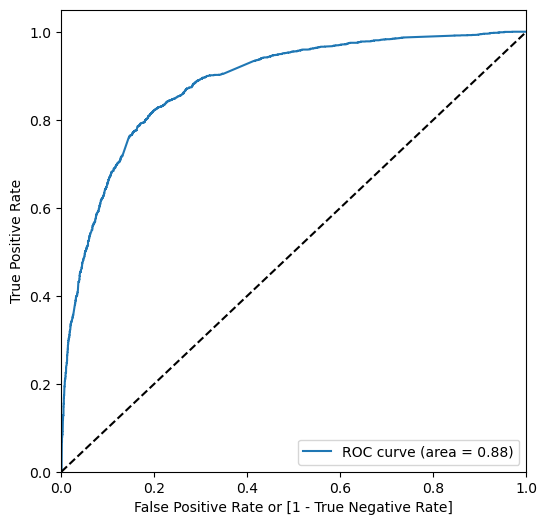

In [495]:
plot_roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

As we can see above that the area under the curve is 0.88 out of 1 ,which means that we have built a good predictive model

### FINDING THE OPTIMAL CUT-OFF THRESHOLD

In [496]:
range_num = [float(x)/10 for x in range(10)]
for i in range_num:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.414511,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.063952,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.273203,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.738396,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.237627,3934,0,1,1,1,0,0,0,0,0,0,0


In [497]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
from sklearn.metrics import confusion_matrix
df_1 = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num= [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    confusion_matrix1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(confusion_matrix1))
    accuracy = (confusion_matrix1[0,0]+confusion_matrix1[1,1])/total1
    
    specificity = confusion_matrix1[0,0]/(confusion_matrix1[0,0]+confusion_matrix1[0,1])
    sensitivity = confusion_matrix1[1,1]/(confusion_matrix1[1,0]+confusion_matrix1[1,1])
    df_1.loc[i] =[ i ,accuracy,specificity,sensitivity]
print(df_1)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.428726     0.079210     0.995945
0.1          0.1  0.573129     0.322089     0.980535
0.2          0.2  0.691558     0.532984     0.948905
0.3          0.3  0.779066     0.715642     0.881995
0.4          0.4  0.811534     0.822089     0.794404
0.5          0.5  0.808287     0.899300     0.660584
0.6          0.6  0.786333     0.938031     0.540146
0.7          0.7  0.750618     0.966017     0.401054
0.8          0.8  0.713049     0.987256     0.268045
0.9          0.9  0.681973     0.994003     0.175588


In [498]:
#plotting the curves- senstivity and specificity for finding the optimal probability threshold
#importing the required libraries
from scipy.interpolate import interp1d
from scipy.optimize import fsolve


In [499]:
# Finding the intersection points of the sensitivity and accuracy curves

sensitivity_interp1d = interp1d(df_1['probability'], df_1['sensitivity'], kind='linear',bounds_error=False,fill_value='extrapolate')
accuracy_interp1d = interp1d(df_1['probability'], df_1['accuracy'], kind='linear',bounds_error=False,fill_value='extrapolate')
intersection_1 = np.round(float(fsolve(lambda x : sensitivity_interp1d(x) - accuracy_interp1d(x), 0.5)), 3)


In [500]:
# Finding the intersection points of the specificity and accuracy curves

specificity_interp1d = interp1d(df_1['probability'], df_1['specificity'], kind='linear',bounds_error=False,fill_value='extrapolate')
intersection_2 = np.round(float(fsolve(lambda x : specificity_interp1d(x) - accuracy_interp1d(x), 0.5)), 3)

In [501]:
# Calculating the average of the two intersection points

intersection_x = (intersection_1 + intersection_2) / 2

In [502]:
# Interpolate the accuracy, sensitivity, and specificity at the intersection point

accuracy_at_intersection = np.round(float(accuracy_interp1d(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensitivity_interp1d(intersection_x)), 2)
specificity_at_intersection = np.round(float(specificity_interp1d(intersection_x)), 2)

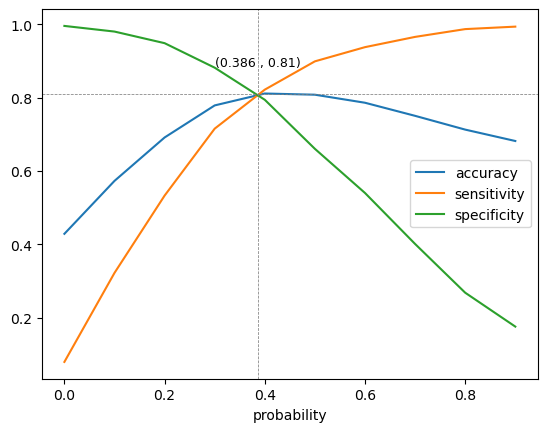

In [503]:
df_1.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')


plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

plt.show()


As it is evident ,0.386 is the point of intersection ie the point where all the curves meet hence this should be our optimal cutoff

In [504]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.386 else 0)

# deleting the unwanted columns from dataframe

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,'Predicted'],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.414511,1871,1
1,0,0.063952,6795,0
2,0,0.273203,3516,0
3,0,0.738396,8105,1
4,0,0.237627,3934,0


In [505]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

temp_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
temp_df['final_predicted'].value_counts()

1    1997
0     469
Name: final_predicted, dtype: int64

In [506]:
# check the precentage of final_predicted conversions

1997/float(1997+469)

0.8098134630981346

### ACCURACY

In [507]:
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

0.8101422387136673


### CONFUSION MATRIX

In [508]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print(confusion_matrix)

[[3243  759]
 [ 469 1997]]


In [509]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [510]:
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8098134630981346


In [511]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8103448275862069


In [512]:
# Calculate false postive rate - predicting conversion when customer does not have converted

print(FP/ float(TN+FP))

0.1896551724137931


In [513]:
# positive predictive value 

print (TP / float(TP+FP))

0.724600870827286


In [514]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8736530172413793


### MAKING PREDICTIONS ON THE TEST DATA SET

In [515]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TotalVisits                               2772 non-null   float64
 1   Total Time Spent on Website               2772 non-null   int64  
 2   Page Views Per Visit                      2772 non-null   float64
 3   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 4   Lead Origin_Lead Add Form                 2772 non-null   uint8  
 5   Lead Origin_Lead Import                   2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                2772 non-null   uint8  
 7   Lead Source_Facebook                      2772 non-null   uint8  
 8   Lead Source_Google                        2772 non-null   uint8  
 9   Lead Source_Olark Chat                    2772 non-null   uint8  
 10  Lead Source_Organic Search       

In [516]:
#looking at the selected columns which were chosen by RFE
selected_columns

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Specialization_Hospitality Management', 'Specialization_International Business', 'Specialization_Others', 'Specialization_Retail Management', 'Specialization_Rural and Agribusiness', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 'Last Activity_Others', 'Last Activity_SMS Sent', 'Current_Occupation_Housewife', 'Current_Occupation_Other', 'Current_Occupation_Student', 'Current_Occupation_Unemployed', 'Current_Occupation_Working Professional', 'Email_Yes', 'Free_copy_Yes'], dtype='object')

In [517]:
#dropping all the columns which are not a part of model building
final=selected_columns.drop(['Current_Occupation_Other','Last Activity_Email Link Clicked','Lead Source_Facebook','Specialization_Rural and Agribusiness','Specialization_Retail Management','Current_Occupation_Student'])
final

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Specialization_Hospitality Management', 'Specialization_International Business', 'Specialization_Others', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 'Last Activity_Others', 'Last Activity_SMS Sent', 'Current_Occupation_Housewife', 'Current_Occupation_Unemployed', 'Current_Occupation_Working Professional', 'Email_Yes', 'Free_copy_Yes'], dtype='object')

In [518]:
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test = X_test[final]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_International Business,Specialization_Others,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Current_Occupation_Housewife,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Email_Yes,Free_copy_Yes
4269,0.933036,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2376,-0.900812,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
7766,-0.793792,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9199,-0.900812,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
4359,-0.900812,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [519]:
# Adding contant value

X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 18)

In [520]:
#Making predictions on the test data set
y_test_pred = lr7.predict(X_test_sm)

In [521]:
#checking the predictions
y_test_pred

4269    0.625603
2376    0.718308
7766    0.678636
9199    0.062304
4359    0.692211
          ...   
8649    0.124302
2152    0.718308
7101    0.234794
5331    0.393142
2960    0.718308
Length: 2772, dtype: float64

In [522]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.625603
2376,0.718308
7766,0.678636
9199,0.062304
4359,0.692211


In [523]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()



,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [524]:
# Removing index for both dataframes to append them side by side 

y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred

y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.625603
1,1,0.718308
2,1,0.678636
3,0,0.062304
4,1,0.692211


In [525]:
 ##Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Probability'})



y_pred_final.head()

,Converted,Converted_Probability
0,1,0.625603
1,1,0.718308
2,1,0.678636
3,0,0.062304
4,1,0.692211


In [526]:
# taking sensitivity-specificity method at 0.388 probability cutoff during training

y_pred_final['Final_predicted'] = y_pred_final['Converted_Probability'].map(lambda x: 1 if x > 0.388 else 0)
y_pred_final.head()

,Converted,Converted_Probability,Final_predicted
0,1,0.625603,1
1,1,0.718308,1
2,1,0.678636,1
3,0,0.062304,0
4,1,0.692211,1


### PLOTTING THE ROC CURVE

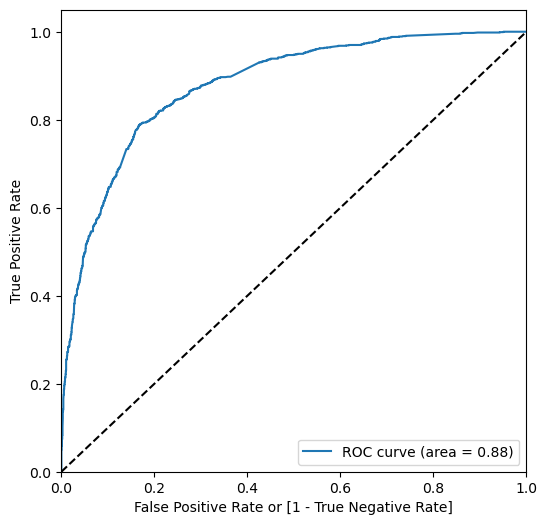

In [527]:
FPR, TPR, Threshold = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Probability"], drop_intermediate = False )

plot_roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Probability"])

As we can see the area under the curve is 0.88 out of 1. Hence the model is performing well on the test data set as well

## Performing other evaluation metrics as well

### Accuracy

In [528]:
print(metrics.accuracy_score(y_pred_final["Converted"], y_pred_final["Final_predicted"]))

0.8080808080808081


### Confusion Matrix

In [529]:
confusion_matrix = metrics.confusion_matrix(y_pred_final["Converted"], y_pred_final["Final_predicted"])
print(confusion_matrix)

[[1370  307]
 [ 225  870]]


### Senstivity and Specificity

In [530]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [531]:
# Let's see the sensitivity of our logistic regression model

print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7945205479452054


In [532]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8169350029815146


In [533]:
# Calculate false postive rate - predicting conversion when customer does not have converted

print(FP/ float(TN+FP))

0.1830649970184854


In [534]:
# positive predictive value 

print (TP / float(TP+FP))

0.7391673746813934


In [535]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8589341692789969


### FOR TRAIN DATA SET    vs    FOR TEST DATA SET
### Accuracy ----      81%              :     80.8%
### Sensitivity----     80.9%           :     79.5%                
### Specificity---      81%              :     81%

----------The above values indicate an effecient model-------------

### PRECISION AND RECALL TRADEOFF

In [536]:
# Creating precision-recall tradeoff curve

y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

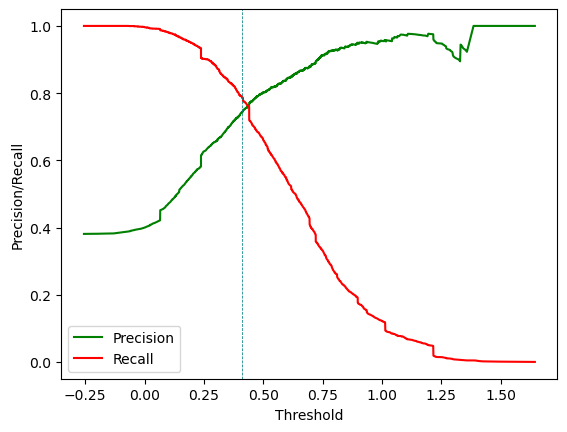

In [537]:
# plot precision-recall tradeoff curve

plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

As per our above analysis we will take probability cutoff as 0.4

In [538]:
y_train_precision_recall = y_train_pred_final.copy()

In [539]:
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.40 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.414511,1871,1,1
1,0,0.063952,6795,0,0
2,0,0.273203,3516,0,0
3,0,0.738396,8105,1,1
4,0,0.237627,3934,0,0


In [540]:
##Looking at the confusion matrix
confusion_matrix1 = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])

In [541]:
print(confusion_matrix1)

[[3290  712]
 [ 507 1959]]


### ACCURACY

In [542]:
print(metrics.accuracy_score(y_train_precision_recall["Converted"], y_train_precision_recall["precision_recall_prediction"]))

0.8115337043908473


### SENSITIVITY AND SPECIFICITY

In [543]:
TP = confusion_matrix1[1,1] # true positive 
TN = confusion_matrix1[0,0] # true negatives
FP = confusion_matrix1[0,1] # false positives
FN = confusion_matrix1[1,0] # false negatives

In [544]:
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7944038929440389


In [545]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8220889555222389


In [551]:
print("Recall:",TP / float(TP+FN))

Recall: 0.7944038929440389


In [552]:
print("Precision :",TP / float(TP+FP))

Precision : 0.7334331710969674


From the above analysis , it is evident that Recall-Precision values are low. Hence we will go with Senstivity and Specificity

In [548]:
y_pred_final['Lead_Score'] = y_pred_final['Converted_Probability'].map( lambda x: round(x*100))
y_pred_final.head()

,Converted,Converted_Probability,Final_predicted,Lead_Score
0,1,0.625603,1,63
1,1,0.718308,1,72
2,1,0.678636,1,68
3,0,0.062304,0,6
4,1,0.692211,1,69


In [549]:
features=lr7.params.sort_values(ascending=False)
features

Lead Origin_Lead Add Form                  0.429084
Current_Occupation_Housewife               0.421522
const                                      0.404770
Last Activity_SMS Sent                     0.294930
Lead Source_Welingak Website               0.292789
Current_Occupation_Working Professional    0.249949
Total Time Spent on Website                0.183428
Last Activity_Others                       0.169521
Lead Source_Olark Chat                     0.148552
Last Activity_Email Opened                 0.091948
Free_copy_Yes                             -0.045207
Current_Occupation_Unemployed             -0.068357
Specialization_International Business     -0.069622
Last Activity_Olark Chat Conversation     -0.080543
Specialization_Hospitality Management     -0.122344
Email_Yes                                 -0.124476
Lead Origin_Landing Page Submission       -0.143366
Specialization_Others                     -0.176884
dtype: float64

### CONCLUSION


The evaluation matrics are very close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

1. The model achieved a sensitivity of 80.09% in the train set and 79.5% in the test set
2. Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
3. The CEO of X Education had set a target sensitivity of around 80%.
4. The model also achieved an accuracy of 80.8%, which is in line with the study's objectives.
